In [48]:
import pandas as pd
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
warnings.filterwarnings("ignore")
import networkx as nx
import numpy as np 

In [90]:
df = pd.read_csv('data/Clinical.csv', index_col=0, sep=",")

In [182]:
df = pd.read_csv('data/DrugResponse.csv', index_col=0, sep=",")

In [204]:

# Define custom normalization function
def normalize_row(row):
    min_val = row.min(skipna=True)
    max_val = row.max(skipna=True)
    if min_val == max_val:  # If all values in the row are the same
        return row
    return (row - min_val) / (max_val - min_val)

def factorize_(df):
    if (df > 0.7):
        return 'High'
    elif (df >= 0.3):
        return 'Moderate'
    elif (df < 0.3):
        return 'Low'

# Apply normalization function to each row
normalized_df = df.apply(normalize_row, axis=1)
normalized_df = normalized_df.applymap(factorize_)


In [208]:
normalized_df.loc['Bendamustine_DNA-alkylating agent'].value_counts()


Bendamustine_DNA-alkylating agent
Moderate    68
High        26
Low          7
Name: count, dtype: int64

<Axes: xlabel='Bendamustine_DNA-alkylating agent'>

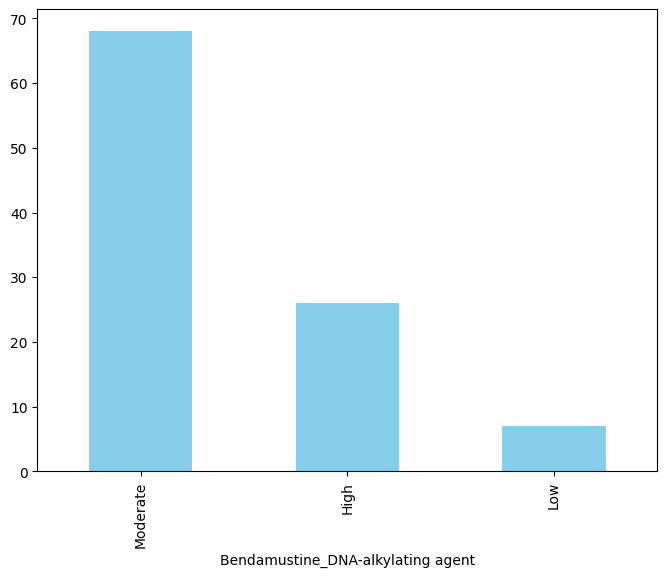

In [213]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


row_data = normalized_df.loc['Bendamustine_DNA-alkylating agent'].value_counts()

# Creating the bar plot
plt.figure(figsize=(8, 6))
row_data.plot(kind='bar', color='skyblue')

In [177]:
normalized_df

,MM013,MM014,MM015,MM017,MM018,MM019,MM021,MM023,MM024,MM025,...,MM123,MM125,MM126,MM127,MM129,MM132,MM133,MM135,MM137,MM138
Bendamustine_DNA-alkylating agent,moderate,moderate,low,moderate,moderate,moderate,high,moderate,high,moderate,...,moderate,high,moderate,high,low,moderate,moderate,moderate,moderate,moderate
Bortezomib_Proteasome Inhibitor regime,moderate,high,high,moderate,low,low,moderate,moderate,moderate,moderate,...,moderate,moderate,moderate,moderate,high,moderate,moderate,moderate,moderate,moderate
Carfilzomib_Proteasome Inhibitor regime,high,high,high,moderate,moderate,moderate,high,moderate,moderate,moderate,...,moderate,high,moderate,moderate,high,moderate,moderate,moderate,moderate,moderate
Cisplatin_Platinum-containing,moderate,moderate,moderate,moderate,moderate,moderate,high,moderate,moderate,moderate,...,high,moderate,moderate,high,moderate,high,high,moderate,high,high
Cyclophosphamide_DNA-alkylating agent,moderate,moderate,moderate,moderate,moderate,moderate,moderate,high,high,moderate,...,moderate,moderate,moderate,moderate,moderate,moderate,moderate,moderate,moderate,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dexamethasone+Thalidomide_Corticosteroid + IMID,high,high,high,high,high,high,high,high,high,high,...,high,moderate,high,high,high,moderate,high,moderate,moderate,moderate
Elotuzumab+Ipilimumab_Immunotherapy,high,high,high,high,high,high,high,high,high,high,...,moderate,moderate,high,moderate,high,moderate,moderate,moderate,low,moderate
Elotuzumab+Nivolumab_Immunotherapy,high,high,high,high,high,high,high,high,high,high,...,moderate,high,high,low,high,moderate,moderate,moderate,low,moderate
Elotuzumab+Pembrolizumab_Immunotherapy,high,high,high,high,high,high,high,high,high,high,...,moderate,high,moderate,low,high,moderate,moderate,moderate,moderate,moderate


In [161]:
normalized_df[normalized_df > 0.1]

TypeError: '>' not supported between instances of 'str' and 'float'

In [156]:
normalized_df

,MM013,MM014,MM015,MM017,MM018,MM019,MM021,MM023,MM024,MM025,...,MM123,MM125,MM126,MM127,MM129,MM132,MM133,MM135,MM137,MM138
Bendamustine_DNA-alkylating agent,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Bortezomib_Proteasome Inhibitor regime,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Carfilzomib_Proteasome Inhibitor regime,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cisplatin_Platinum-containing,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cyclophosphamide_DNA-alkylating agent,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dexamethasone+Thalidomide_Corticosteroid + IMID,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Elotuzumab+Ipilimumab_Immunotherapy,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Elotuzumab+Nivolumab_Immunotherapy,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Elotuzumab+Pembrolizumab_Immunotherapy,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [127]:

G = nx.from_pandas_adjacency(df)
Clusters = nx.community.louvain_communities(G, seed=123)

NetworkXError: ('Columns must match Indices.', "['UNIPROT:Q96EM0', 'DHX29', 'CBX3', 'DDX23', 'MTHFS', 'EIF2S2', 'MYH9', 'TBL3', 'GSR', 'SLC44A2', 'PWP2', 'ATPAF1', 'SIRPB1', 'ADGRG1', 'CRYZL1', 'KPNA6', 'RAP1GDS1', 'OST4', 'PSME3', 'GNAI2', 'RPS21', 'SERPINB1', 'HACD4', 'GLA', 'AP4B1', 'UNIPROT:O94966', 'MORF4L2', 'CYLD', 'MYO1G', 'STIP1', 'SSR3', 'ADSL', 'IGKV3D-20', 'TOMM34', 'MYDGF', 'TMEM41B', 'DIEXF', 'UNIPROT:Q6MZP7', 'UBA3', 'FBP1', 'UBP1', 'EIF5B', 'PIN4', 'PHF3', 'GAPDH', 'TMEM230', 'MAGOH', 'KHDRBS1', 'UNIPROT:Q99504', 'WDR77', 'NDRG3', 'NFATC1', 'CSK', 'MTRES1', 'CUX1', 'MDP1', 'MTPN', 'CDC123', 'CD3G', 'GP1BB', 'C8orf82', 'NLE1', 'DNAJB1', 'GOLM1', 'HLA-DPA1', 'UTP6', 'C19orf25', 'GABPB1', 'PHRF1', 'ATP5PB', 'PAIP1', 'RB1', 'GALM', 'TSFM', 'TIMMDC1', 'DNAJC1', 'DEK', 'LGALS9', 'GATAD2B', 'PRPF4B', 'CTSC', 'WDR36', 'SLC31A1', 'PPP1CC', 'EIF4E', 'CCT7', 'RPL24', 'NDUFS6', 'PARD3', 'DRG1', 'NRBP1', 'RAB33B', 'MYO18A', 'ERGIC3', 'ASPRV1', 'MAGT1', 'METTL1', 'NIBAN1', 'WASF2', 'AKAP13', 'NUDT16L1', 'RHOF', 'PSIP1', 'DCD', 'IMMT', 'NSL1', 'AP5Z1', 'RGS3', 'AIFM1', 'MKRN2', 'SP3', 'HBS1L', 'AKT2', 'PRKDC', 'UNIPROT:Q9BVV7', 'USP10', 'STX10', 'IGFLR1', 'ENPEP', 'TGFB1I1', 'MIA3', 'RPS25', 'JUP', 'PCNP', 'SUPT6H', 'PIK3CA', 'RXRB', 'ADI1', 'NFU1', 'SHC1', 'DEGS1', 'IMPAD1', 'TBC1D10C', 'IFI44', 'ELOB', 'MVD', 'LETMD1', 'UBTF', 'UNIPROT:Q2PPJ7', 'ABCD3', 'PAPSS2', 'WDR81', 'APOBR', 'ADH5', 'UNIPROT:Q13042', 'PLXNB2', 'SMAP1', 'CHMP5', 'SWAP70', 'FAF2', 'BTLA', 'RPS4X', 'PIP4K2B', 'WFS1', 'EXOC6', 'YTHDC1', 'MYL4', 'SLC25A6', 'SIL1', 'NPC1', 'LIX1L', 'TBCC', 'FUBP3', 'TES', 'STX11', 'NACC1', 'GSTM1', 'MECP2', 'UQCRC1', 'PSD4', 'IMPDH2', 'UNIPROT:Q9Y6Y0', 'LRRFIP2', 'SSB', 'MARK2', 'CCDC167', 'MT-ND4', 'WAS', 'RPL29', 'PSMA6', 'RPA1', 'AARSD1', 'CGGBP1', 'SLC15A3', 'COX5B', 'GLO1', 'TRANK1', 'ABCC1', 'RABGAP1', 'TBL1XR1', 'GNPDA2', 'GLS', 'DOCK10', 'DTNBP1', 'PES1', 'OPA1', 'COPE', 'CWC15', 'TTR', 'ANXA2', 'DNMT1', 'LMAN2', 'SNX9', 'CAPN7', 'NBEAL2', 'MRPL39', 'PRDX4', 'RNMT', 'CD97', 'EPHX2', 'LGALS3BP', 'CEP135', 'RAD21', 'GLIPR2', 'UBE2G2', 'RBM26', 'PDPR', 'TIMM10', 'RBCK1', 'GTF2E1', 'IPO11', 'TAOK3', 'NUDT16', 'GSDMD', 'UBE2I', 'MAN2C1', 'PAXX', 'GRK2', 'CEP57', 'PDCD11', 'TTC9C', 'BORCS8', 'CDC42SE2', 'ATP1B3', 'TRAPPC3', 'STX18', 'POLR1D', 'UNIPROT:Q9BSV6', 'ROCK2', 'RPLP0', 'POLR3F', 'UNIPROT:Q03111', 'ORC4', 'PGGT1B', 'BAG4', 'HDAC2', 'YIPF5', 'VCAN', 'MTREX', 'C5orf22', 'GMDS', 'MTA2', 'SYNCRIP', 'SEC61B', 'TJAP1', 'FABP3', 'MRPL54', 'MPO', 'POLR2G', 'RHBDD2', 'RPS7', 'TWF2', 'NEK9', 'CCNK', 'GRIPAP1', 'SEC62', 'RPN2', 'PACS1', 'ACYP1', 'PLD1', 'KRT1', 'RHEB', 'ASH2L', 'PMPCA', 'ITIH3', 'CERT|CERT1', 'RFC5', 'NELFCD', 'SPR', 'LSM3', 'UXT', 'MPP1', 'RAN', 'TACC3', 'SPATS2', 'CRKL', 'EXOG', 'GALNT2', 'IGKC', 'SLC9A1', 'JSRP1', 'STX17', 'DHRS11', 'SLC35A4', 'TMEM131', 'PHB', 'RETREG3', 'RANBP9', 'HDGF', 'HSP90AA1', 'SIT1', 'ZC3H18', 'CAMK1D', 'ZC3H11A', 'PPIH', 'UQCRH', 'EXOSC3', 'ARFRP1', 'ANKMY2', 'HP1BP3', 'PDIA3', 'RPTOR', 'PNN', 'IFT27', 'RBL2', 'ITGB5', 'HSP90AA2P', 'CAVIN2', 'GC', 'DNLZ', 'PPTC7', 'CDK6', 'RABL6', 'AP3S1', 'MOSPD2', 'RRBP1', 'ESYT2', 'FAH', 'TOR1AIP1', 'RPL37A', 'B3GLCT', 'GSTZ1', 'PDCD2', 'KPNA1', 'SLC25A20', 'HLA-F', 'KPNB1', 'RCSD1', 'PCYT2', 'SPCS1', 'CS', 'NUDT5', 'SLC30A9', 'RDH14', 'MTDH', 'ZFPL1', 'DARS', 'COG3', 'GAMT', 'MRPS34', 'SCAF11', 'CTSB', 'VIPAS39', 'PRKAG1', 'RAB6D', 'NDUFB8', 'FXN', 'UNIPROT:Q86V21', 'CARMIL1', 'NCOA7', 'FBXO22', 'TRAPPC9', 'DCXR', 'PPP3CA', 'SHMT1', 'RPRD1A', 'PLCB3', 'CTSZ', 'PTGR2', 'IGBP1', 'CIAO2A', 'TMEM256', 'ANKRD36|ANKRD36C|ANKRD36B', 'PQBP1', 'FOXP1', 'ALOX12', 'IKBIP', 'CTBP1', 'PPAN', 'GMPS', 'CHUK', 'MAD1L1', 'GHDC', 'ECHDC1', 'PPP3CC', 'DCAF8', 'UNIPROT:Q8TEQ0', 'ARFIP2', 'PRPF40A', 'GZMH', 'EXOC5', 'ALDH16A1', 'ALPL', 'GOLGA1', 'PTRH2', 'SND1', 'P4HA1', 'APOH', 'SELENOS', 'MKI67', 'AIMP2', 'ERLEC1', 'ETV6', 'CRISP3', 'PPHLN1', 'C9orf64', 'UROD', 'MGAT2', 'ACTN1', 'NAPRT', 'ACP2', 'COL2A1', 'TPD52L1', 'KDELR2', 'TIMM29', 'HS1BP3', 'CYTH4', 'ATP2A2', 'WBP2', 'OSBPL9', 'MRPL34', 'DSG1', 'MAGEC1', 'GLTP', 'NCK1', 'CCDC58', 'C16orf54', 'TEX10', 'PGM1', 'PBRM1', 'SART1', 'ATP5MF', 'MYO9B', 'EPS15', 'MTOR', 'PARVB', 'MBD3', 'SARS', 'CD163', 'MRPL44', 'HMGB2', 'RILP', 'PEBP1', 'PRPF39', 'MBD1', 'ZNF706', 'TMPPE', 'OCC1', 'DENND2D', 'LGALS8', 'CD5', 'METAP2', 'MCCC2', 'PSMA2', 'CASS4', 'NAA50', 'HIP1R', 'TIAL1', 'SUMO3', 'LRSAM1', 'U2AF1L5|U2AF1', 'TMEM209', 'FOXN3|FOXN2', 'TBC1D2B', 'GP1BA', 'ALDH1L2', 'NPEPL1', 'HSF1', 'DENND3', 'TTLL12', 'GNB1', 'MGST1', 'POP7', 'MGST3', 'GOLGA5', 'IRF2BP1', 'ZSCAN26', 'SMAP', 'FAM50A', 'CTSA', 'HAT1', 'HRG', 'APOL2', 'UNIPROT:Q9HAN9', 'NID1', 'ATM', 'UNIPROT:Q5TEU4', 'OAT', 'NUP54', 'IL16', 'UNIPROT:Q9ULE6', 'RAP2B', 'MAVS', 'ATP6V1E1', 'NIBAN2', 'NUP43', 'PUS1', 'ASAP2', 'APOD', 'LYRM4', 'HSPA13', 'CCDC186', 'SDCBP', 'CPSF1', 'PIAS1', 'ETS1', 'RIOX1', 'FAR1', 'RBX1', 'TARS1', 'LYSMD2', 'BUB3', 'ARHGDIB', 'CARS2', 'EMC3', 'POLR2J', 'SYNGR2', 'GPR107', 'NDUFA8', 'APOB', 'PPP1R9B', 'NIT2', 'UQCC2', 'LRRC59', 'ARHGAP27', 'ZNF22', 'TBC1D13', 'DIAPH2', 'GATM', 'ZMPSTE24', 'SLK', 'STAT5A', 'CASC3', 'TAF15', 'CEP170', 'UNIPROT:Q9UPS6', 'TOR1B', 'UNIPROT:Q96HJ9', 'ME2', 'H2AFX', 'TPK1', 'CNOT9', 'ARIH2', 'TCIRG1', 'ACTN4', 'LST1', 'SIDT2', 'RAB4B', 'POLR3E', 'CSTA', 'SSBP1', 'IRF9', 'CSTB', 'ALDH1A1', 'HNRNPH3', 'ETFRF1', 'AK3', 'CPNE3', 'CST3', 'SF3B4', 'LMF2', 'GGH', 'GTF3C3', 'PTBP1', 'CCM2', 'SELENOK', 'TNFRSF17', 'PSMD7', 'PTPRA', 'TP53I11', 'DEPTOR', 'CTSW', 'ADPRH', 'CASC4', 'POLR2E', 'DDX6', 'AP5S1', 'IPO9', 'ARAP1', 'NMI', 'IKBKE', 'POLR2B', 'FCER1G', 'HERPUD1', 'ETHE1', 'NBN', 'UBQLN4', 'UBE2D1|UBE2D4', 'STRN3', 'FGD2', 'POLD1', 'THUMPD1', 'POTEJ', 'MPC2', 'SEC24A', 'DESI1', 'CMTR1', 'RUFY1', 'NDUFS4', 'GMEB2', 'CRNKL1', 'IRF4', 'SCPEP1', 'UNIPROT:Q6NXR4', 'GLDC', 'NDC1', 'TAOK1', 'OLA1', 'PLOD3', 'ASAH1', 'EPB41L2', 'TCF20', 'LUC7L3', 'STOM', 'CD2BP2', 'PSMB5', 'S100B', 'NSMCE3', 'CSNK1A1|CSNK1A1L|CSNK1A1|CSNK1A1L', 'IGKV1-27|IGKV1-8|IGKV1-9', 'USP4', 'GPX4', 'FCAR', 'DTX3L', 'ADA2', 'TMED2', 'CBLB', 'PTER', 'PPFIA1', 'H2AFY', 'PDCL', 'VARS2', 'LYPLA2', 'CD47', 'UBE3A', 'APOA2', 'MS4A3', 'RPP40', 'RFC3', 'DAG1', 'HEMGN', 'MRPL33', 'NUDT8', 'PITPNM1', 'LRRC25', 'TIMM50', 'RBM4', 'TMEM165', 'FGFR1OP', 'RPS29', 'TMCC3', 'PRRC2B', 'NAE1', 'H3-3A|H3-3B', 'TOMM70', 'MED23', 'TMA7', 'PPWD1', 'IL17RA', 'SQOR', 'QPRT', 'NT5DC2', 'MTM1', 'SAP130', 'SHMT2', 'SYNGR1', 'SFN', 'NUDT19', 'GGPS1', 'GTF2A2', 'CYBC1', 'HLA-DQB1', 'NXF1', 'BAX', 'FERMT2', 'DMXL2', 'BRMS1', 'MAFG|MAFK|MAFF|MAFK', 'UBR7', 'SCRN3', 'PSMB10', 'RFT1', 'GIGYF2', 'ALB', 'SETD3', 'MED21', 'INTS11', 'MYLK', 'ACPP|ACP3', 'UNIPROT:O95208', 'ST13', 'TSTA3', 'RRP12', 'NUDT21', 'CCL5', 'TAF6', 'KIF5B', 'A2M', 'RAB14', 'BLVRA', 'ENDOD1', 'EXOC3', 'BCL7C', 'RPA2', 'TRIM65', 'MAP3K3', 'TMX1', 'AGPS', 'TUBA1B', 'ZNF593', 'AKR1A1', 'PDCL3', 'RICTOR', 'HMGB3', 'CD63', 'RPS19BP1', 'LZTFL1', 'SELENOH', 'ACSL1', 'PI4K2A', 'NUP93', 'BTN3A3', 'COX7A2', 'SERPINB10', 'XPNPEP3', 'DENND1C', 'SERPINA3', 'PREP', 'MRPL55', 'NDUFB3', 'ARAF', 'QDPR', 'BRCC3', 'SNX15', 'DHX37', 'PLPBP', 'ITGAD', 'TXN', 'BLOC1S5', 'MEAF6', 'IFIT2', 'BIN1', 'YLPM1', 'VPS52', 'LEO1', 'RRP1', 'PPP5C', 'KALRN', 'CCDC97', 'FLNA', 'DHRS7', 'TXNDC12', 'FRG1', 'ZAP70', 'UQCRC2', 'RPS19', 'VCL', 'ADPRHL2', 'RRS1', 'COG1', 'NUDC', 'LYPLA1', 'TSPO', 'UNIPROT:Q6ZTQ3', 'IFI16', 'RASGRP2', 'DDX41', 'CHD3', 'IGF2BP2', 'HNRNPH1', 'FAM91A1', 'CRYBG1', 'IRAK1', 'GALE', 'PLCG1', 'UNIPROT:Q9H0W8', 'MLKL', 'ZMYND8', 'RENBP', 'TSPAN14', 'PHPT1', 'PTCD3', 'PSMC1', 'MAP4K4', 'EHMT2', 'EVI2B', 'VNN2', 'HLA-E', 'NUP160', 'PRPF38B', 'MRPS31', 'GYS1', 'MAN2A1', 'ARID3A', 'PPME1', 'DYNLT1', 'FCRLA', 'PIK3AP1', 'CIAO3', 'C1GALT1', 'EMB', 'AGPAT5', 'CKAP4', 'VPS4A', 'RAVER1', 'UNIPROT:P52735', 'CNTN1', 'CWF19L1', 'MTPAP', 'BCL2L11', 'GOLGA3', 'BASP1', 'COPA', 'DDX24', 'FAM120B', 'PDIA4', 'RANBP3', 'RAB27A', 'PDE3A', 'IGLL5', 'CSNK2A1', 'DENR', 'TRIM25', 'NAPA', 'GNPNAT1', 'DDX21', 'PAK2', 'ACTR2', 'LTV1', 'HSPA9', 'VKORC1L1', 'CSTF3', 'LSM2', 'LYST', 'UNIPROT:iRT_Protein', 'ARHGAP15', 'MSN', 'SLC44A1', 'ACSF3', 'APMAP', 'LAMP1', 'CD81', 'HINT3', 'RPL6', 'SLC17A5', 'MAPK3', 'PMPCB', 'NCBP2', 'CTNNB1', 'STX8', 'HSPA8', 'TMEM263', 'ROCK1', 'GHITM', 'SLC35E1', 'KIN', 'PCBP1', 'CORO1B', 'G6PD', 'GLRX5', 'CIAO1', 'DCTD', 'HLA-DMA', 'DNAJC5', 'NCF2', 'LIG4', 'PLCB2', 'RAP2A', 'CALCOCO1', 'CCDC124', 'NDUFA5', 'SURF6', 'TMCC1', 'NOL7', 'TOX4', 'PPIL2', 'PTK2B', 'F2', 'PSMB3', 'ASNS', 'SCYL3', 'TAGLN2', 'FGF2', 'TMEM43', 'PGK1', 'EPPK1', 'SBDS', 'RPS11', 'ZGPAT', 'GNAI3', 'SLC35B2', 'CDK5RAP3', 'EIF2AK3', 'HBG2', 'SNX12', 'SRSF4', 'PRKD2', 'RBM6', 'HBD', 'BCAP29', 'A1BG', 'VPS13B', 'NDUFAF2', 'IGHM', 'HNRNPA1', 'RAB5C', 'SIPA1', 'TIMM22', 'VPS51', 'NAGLU', 'NUP133', 'ELP2', 'RBM14', 'RAB9A', 'HBB', 'GALT', 'DCTN6', 'ALG8', 'RACK1', 'JAK2', 'FCHO2', 'PON2', 'PSMA1', 'DDX39A', 'GLRX3', 'IL1RAP', 'WDR46', 'RBMS1', 'PPAT', 'NDUFB11', 'IFITM2', 'TTC38', 'BAZ2A', 'PYURF', 'GET4', 'CDKN2AIPNL', 'NUBPL', 'MRPS18C', 'TSNAX', 'TNFAIP1', 'CHERP', 'NIPSNAP2', 'VWF', 'RPL5', 'MRC1', 'SARS2', 'SCRIB', 'MAPRE1', 'ENY2', 'MAD2L1BP', 'TBK1', 'MAP2K2', 'PRIM1', 'CLCN7', 'SARNP', 'PAICS', 'VPS25', 'TMEM245', 'PSMD14', 'ETF1', 'ORM2', 'DUT', 'RMDN3', 'MACO1', 'HEXA', 'POFUT1', 'LY75', 'PLRG1', 'RGS10', 'PTPN11', 'ATP5PF', 'LIMD2', 'HEBP2', 'CFH|CFHR1|CFH', 'ACBD3', 'PFDN5', 'SRSF3', 'ATG9A', 'UCHL1', 'CWC22', 'EIF2S1', 'MALT1', 'PTPRG', 'TRRAP', 'ARHGEF7', 'UBA6', 'ALDH5A1', 'ERAL1', 'SF1', 'POLDIP3', 'PA2G4', 'UNIPROT:Q8N138', 'UNIPROT:P48651', 'PGLYRP1', 'MPHOSPH10', 'TSR1', 'ALG5', 'ACIN1', 'ENO2', 'DAPP1', 'MIPEP', 'C9', 'UNIPROT:Q9NZC3', 'TTC33', 'DNAJC3', 'MAOA', 'XRCC6', 'CISD1', 'HADH', 'DOCK2', 'RPS3', 'CSTF2', 'JPT1', 'PRPF19', 'MDN1', 'PIH1D1', 'ECPAS', 'CHID1', 'PCK2', 'MFN2', 'AVL9', 'NAT10', 'SRSF5', 'UBE2J1', 'RAP1B', 'ACSL4', 'CROCC', 'HIST3H2BB', 'ACTR10', 'TASOR', 'MCM2', 'NHSL2', 'UNIPROT:Q9Y217', 'PRXL2A', 'CCDC6', 'TANGO2', 'MAP3K5', 'CLNS1A', 'CXorf38', 'ARL1', 'CD101', 'DDX3X', 'NFXL1', 'CTSG', 'SUMO2', 'UNIPROT:Q12841', 'UBXN7', 'AMPD1', 'WIPI1', 'PIK3CB', 'PYCR1', 'STK17B', 'SYTL4', 'SERPIND1', 'NSUN2', 'CLEC12A', 'UNIPROT:Q8WUD1', 'SLC4A1AP', 'HAGH', 'CEP128', 'ACD', 'CUL4B', 'COG7', 'EMC4', 'XRN1', 'ARL6IP5', 'FGFR1OP2', 'PARP4', 'CCT5', 'ZNRD2', 'TK2', 'GTPBP6', 'UBE2E3|UBE2E2', 'SHARPIN', 'RPL18', 'NMD3', 'PEX5', 'APIP', 'PPM1G', 'NFATC2IP', 'CYB5R1', 'DIP2A|DIP2B', 'YWHAB', 'EIF3F', 'TRMT5', 'C1orf226', 'SSNA1', 'TCP11L1', 'TTC39C', 'NVL', 'ISG15', 'CR1', 'APOC1', 'GNL2', 'UNIPROT:Q13395', 'YWHAE', 'LGALS7|LGALS7B|LGALS7|LGALS7B', 'DUSP23', 'TAP1', 'DIABLO', 'GTF3C5', 'GATD3A|GATD3B', 'SERPINE2', 'USP15', 'EXOSC2', 'MYOF', 'UNIPROT:Q9NZC9', 'RPL23A', 'FLYWCH2', 'ZNF622', 'PARP10', 'SUGT1', 'UPF2', 'CHCHD1', 'SAP30L', 'TTC19', 'MAPKAPK3', 'RHOC', 'BHLHA15', 'UQCRFS1', 'NUP188', 'ARMCX3', 'CBL', 'TCF25', 'HBA1|HBA2|HBA1|HBA2', 'INIP', 'MSRA', 'RPL9|RPL9P7|RPL9P8|RPL9P9', 'CD4', 'DBT', 'ABCF2', 'CYBB', 'SPTBN2', 'PUF60', 'RCL1', 'SUPV3L1', 'PDXK', 'FUCA2', 'LYSMD3', 'ALG9', 'PIGO', 'IDI1', 'RPS26', 'CSTF1', 'UNIPROT:P86790;P86791', 'PIGBOS1', 'SNX4', 'SRI', 'FDXR', 'CASP1', 'UBE2V2', 'PEX19', 'VPS8', 'RMND1', 'HPCAL1', 'STXBP3', 'TUBB', 'OTUD6B', 'PPM1A', 'UNIPROT:Q9UIW2', 'MRPL18', 'PSMF1', 'GMFG', 'MRPL3', 'GGT3P|GGT1|GGT2|GGT1', 'RAB39B', 'OPLAH', 'GALNS', 'ORC2', 'CLTA', 'CFAP298', 'NOB1', 'CD7', 'GNAS', 'SMC1A', 'AGPAT3', 'VARS|VARS1', 'HIP1', 'SRCAP', 'UNC119B', 'TGFB1', 'SDF4', 'GZMA', 'STT3A', 'SNX17', 'GNG2', 'ENTPD1', 'HDDC3', 'AHCTF1', 'YWHAQ', 'RBM27', 'UQCRQ', 'WASHC5', 'ZBP1', 'SURF1', 'RALA', 'METAP1', 'MRPS17', 'NT5DC1', 'AGA', 'ERAP1', 'KRT16', 'STXBP6', 'CRK', 'MESD', 'FXR1', 'PHF10', 'HP', 'AMPD2', 'AFM', 'STBD1', 'DBN1', 'NPC2', 'SYNRG', 'MRPS16', 'NOC2L', 'AUP1', 'ZFAND1', 'USP39', 'PDCD10', 'STX7', 'ABAT', 'UBXN4', 'USF1', 'MCUR1', 'MTFR1L', 'HSPE1', 'NCLN', 'P3H1', 'PEPD', 'BIN2', 'HTT', 'MMRN1', 'SSR4', 'ATP1A1', 'HADHA', 'MTHFD1L', 'HECTD1', 'SRA1', 'RBM15', 'STOML2', 'OGDH', 'RAB3D', 'IQGAP1', 'EFR3A', 'EXOC8', 'MRPL20', 'SPCS2', 'SOD1', 'RAP1GAP2', 'SCFD1', 'TBCB', 'VTA1', 'CASP3', 'CNDP2', 'STX12', 'KCNA3', 'SATB1', 'BMS1', 'MINK1', 'UNIPROT:P04920', 'LMNB1', 'SH3BP1', 'AARS2', 'RIPK1', 'METTL9', 'OCIAD2', 'SARM1', 'IRF5', 'EXOC6B', 'CLPTM1L', 'PLIN3', 'RAB32', 'RPL17', 'MIER1', 'BCLAF1', 'PPFIBP2', 'UNIPROT:Q8N5M1', 'UNIPROT:Q9Y240', 'CRYL1', 'ACOT9', 'TCOF1', 'MSR1', 'GZMB', 'IDH3B', 'PFKP', 'INPP5D', 'PDE12', 'TMEM258', 'ECI1', 'MOB1A', 'CPNE2', 'RHOG', 'ARPC3', 'GTF2E2', 'ECE1', 'CYB5A', 'TNIK', 'ZW10', 'ISCA2', 'SAMHD1', 'TRIM24', 'ARPIN', 'BCL2L1', 'AATF', 'STMN1', 'WDR18', 'UNIPROT:O95619', 'PPP4R3A', 'VPS36', 'RNF214', 'CPOX', 'RNPEP', 'MPP6', 'MACF1', 'STK38L', 'GTF2F2', 'TRADD', 'NUDCD2', 'BET1L', 'RBBP5', 'UNIPROT:Q86UY6', 'FERMT3', 'CALML3', 'SHFL', 'PLAA', 'RBM17', 'EIF3I', 'RPL7L1', 'ACTN3', 'ATR', 'IL1RN', 'COASY', 'UNIPROT:P11047', 'CENPV', 'UBIAD1', 'HOOK1', 'RBSN', 'MAT2B', 'POLR1B', 'LRRC40', 'NQO2', 'MYCBP2', 'RNF181', 'PPP2R2A', 'UNIPROT:Q504Q3', 'ASAP1', 'COPS4', 'H1-3', 'PWP1', 'CCNY', 'RMC1', 'TMPO', 'TELO2', 'SIRT1', 'LAMP2', 'XRN2', 'GPX7', 'HTRA2', 'LAMTOR1', 'CPSF3', 'FGD3', 'LSP1', 'AHSA1', 'DDAH2', 'HNRNPA3', 'TUBA8', 'MTHFR', 'LEMD3', 'CAPRIN1', 'UCHL3', 'LUC7L', 'PDE4DIP', 'GAS2', 'LAGE3', 'CD55', 'SNRPGP15|SNRPG', 'PPP2R1B', 'CANX', 'SAMSN1', 'SNAP29', 'ITGB3', 'UBL4A', 'NIPBL', 'RPRD1B', 'SMARCD1', 'RPF2', 'CYTH2', 'GLUL', 'AOC3', 'LILRB3', 'PRF1', 'RPL8', 'NIPSNAP1', 'RPL35', 'ATOX1', 'POLR2H', 'TOLLIP', 'NDUFB10', 'RCN3', 'PSMD3', 'COBLL1', 'NDUFA12', 'DDX51', 'EPN1', 'C4BPA', 'ENSA', 'SERPINC1', 'SCAF8', 'RAB7A', 'FKBP5', 'KPNA4', 'MRPS28', 'LTN1', 'DDX47', 'NUP98', 'TTYH3', 'MRPL57', 'PM20D2', 'SERPINB2', 'ERGIC2', 'KRT6A', 'MPRIP', 'RPS15A', 'RBMXL1', 'IGLV1-51', 'ALDOC', 'SYF2', 'NME2', 'GRHPR', 'LRCH3', 'EIF3B', 'HLA-DPB1', 'PXK', 'EML2', 'INSR', 'ALDH4A1', 'ITIH2', 'PPP1R18', 'FMNL1', 'PIGS', 'HK1', 'UNC45A', 'SNRPD2', 'PARN', 'SERPINA1', 'GNB2', 'SAP30', 'CELF1', 'PEX14', 'ORC5', 'MRPS36', 'STAG2', 'HNRNPC', 'ACTR3', 'CPVL', 'DCLK1', 'EMC1', 'CLN5', 'SOWAHD', 'TRIM22', 'CASP4', 'NOP14', 'XAB2', 'DNAJC9', 'POLR2C', 'VSIG4', 'TXNDC11', 'PHYKPL', 'GNPDA1', 'SMAD2', 'CDC73', 'INPP1', 'LAT2', 'RPRD2', 'PTPRCAP', 'DDX54', 'PLXDC2', 'MRPL13', 'CLASP2', 'EIF3D', 'SLC30A5', 'GPR89A|GPR89B', 'CHAMP1', 'CYB5R2', 'ZNF185', 'SELL', 'HMCES', 'IGKV2-28|IGKV2D-29|IGKV2D-30|IGKV2-40|IGKV2D-26|IGKV2-29|IGKV2D-40|IGKV2D-28|IGKV2-30', 'AKAP10', 'HMGA1', 'ARG1', 'UBAP2L', 'TCERG1', 'TOR2A', 'COG2', 'VPS39', 'OSBPL11', 'TMED5', 'NCAPG', 'SIGLEC9', 'COPS7B', 'RPL3', 'URB1', 'MAP2K1', 'PRRC1', 'EXOSC10', 'TOE1', 'CBX1', 'ITGA4', 'FCN2', 'PON1', 'PECAM1', 'DERA', 'SCAF4', 'H2BC11|HIST1H2BO|HIST1H2BB|HIST2H2BE', 'PDE5A', 'POLR2I', 'ZC3H14', 'ADAR', 'MDM1', 'SAAL1', 'SCYL1', 'ATP5IF1', 'FLI1', 'SCAF1', 'RHOT1', 'MYL12A', 'SETD7', 'RABEP2', 'TUT7', 'CENPC', 'HSD17B7', 'NECTIN2', 'LYZ', 'WASH3P|WASH2P', 'ABCF1', 'SHTN1', 'ALDH6A1', 'MLYCD', 'GMIP', 'RBM25', 'BRD1', 'MIOS', 'ILF3', 'PSMD9', 'THAP11', 'MRPL11', 'ACO2', 'SLC25A3', 'SLC39A14', 'WDR75', 'MRPS14', 'DLAT', 'HEATR1', 'THG1L', 'SCCPDH', 'RARRES2', 'SNX6', 'SIRPG', 'EPB41', 'SEC24D', 'ARF6', 'CCDC93', 'UNIPROT:O14908', 'DHPS', 'JAM3', 'SRPRA', 'HIBCH', 'RGS14', 'VPS35L', 'MCAT', 'CLPX', 'DHX9', 'HSPG2', 'SPART', 'MAST3', 'EIF3K', 'MT-CO2', 'TMEM40', 'CPSF2', 'NDUFC2', 'NLN', 'EP300', 'EIF2AK2', 'U2SURP', 'EXOC1', 'CUTC', 'ATG5', 'DPEP1', 'SUMF2', 'ISCU', 'LILRA6', 'HSPA4', 'QARS|QARS1', 'DNAJC19', 'SSU72', 'TMEM87B', 'ASPH', 'ARPC5L', 'GLUD1', 'COG5', 'USE1', 'SOD2', 'DRG2', 'SART3', 'FH', 'TREML1', 'H1-0', 'GYG1', 'CAB39L', 'SMAD4', 'AIP', 'EEA1', 'CNOT3', 'FEN1', 'C17orf75', 'UNK', 'POP1', 'YTHDF3', 'NDUFV1', 'GSKIP', 'EMC2', 'ACO1', 'SLC36A1', 'VRK1', 'DHRS4', 'AGK', 'YTHDC2', 'DCTN1', 'CAND1', 'NUP37', 'ISOC2', 'COPG1', 'ZNF638', 'VTN', 'SLC2A1', 'GTF2H2|GTF2H2C|GTF2H2C_2', 'CAV1', 'USP5', 'TRAM1', 'HLA-DRB4', 'UQCC3', 'PTPA', 'DPY30', 'TAF7', 'APTX', 'C12orf10', 'MCTS1', 'PSMG4', 'VPS41', 'WDR37', 'UPF3B', 'SASH3', 'MPI', 'TMEM106A', 'LPCAT3', 'RNASE3', 'TMEM214', 'MORC3', 'BLMH', 'THEMIS', 'SNRNP70', 'LYAR', 'CNOT7', 'PSMA7', 'UNIPROT:Q8WY36', 'RAB11FIP1', 'MRPS9', 'FGA', 'TDP2', 'BPI', 'IDH2', 'PRSS1', 'UNIPROT:O95801', 'MAN1B1', 'C1QBP', 'PDPK1|PDPK2P|PDPK1', 'AASDHPPT', 'CASC1', 'DCP1A', 'CDS2', 'RANGAP1', 'MRPL2', 'MRPL32', 'OGT', 'PARP16', 'PUM3', 'DYNC1LI1', 'MOGS', 'UNIPROT:Q9UPZ3', 'EBP', 'LILRB2', 'RABGGTA', 'UNIPROT:Q8WV22', 'CCDC22', 'NUCB2', 'PDIA6', 'PPP2CB', 'RPE', 'UNIPROT:P31785', 'NPM3', 'FKBP7', 'MAEA', 'STK25', 'ATP13A1', 'MTO1', 'DNAJA3', 'C2orf88', 'SRSF7', 'PTPN23', 'TRMT6', 'EIF5A', 'ZNF318', 'PNPLA6', 'NONO', 'GTF2B', 'KLC1', 'SEC16A', 'TRAF2', 'BYSL', 'BAG5', 'VPS13A', 'RABGAP1L', 'AHCYL1', 'NCAPH', 'ARPC1B', 'LRRC57', 'CYC1', 'GNPAT', 'NDUFB7', 'SS18', 'SRP54', 'CNOT8', 'GPR108', 'ODR4', 'RAB37', 'FYB1', 'SRBD1', 'JMJD6', 'DSN1', 'NFRKB', 'UNIPROT:Q14142', 'MRPS26', 'ALKBH5', 'INPP4A', 'COQ3', 'TRIP11', 'PAM16', 'RPL36A', 'DST', 'USP8', 'H1-2', 'LNPEP', 'PCIF1', 'CD84', 'SIGLEC5|SIGLEC14', 'PTP4A1', 'CDK9', 'ATL3', 'EIF3C', 'ANP32B', 'FN3KRP', 'LSM4', 'PSMD13', 'C1orf162', 'STRN', 'VPS26A', 'HSDL2', 'ZFYVE1', 'FARSA', 'CPN2', 'MPIG6B', 'IGLC2|IGLC3', 'EIF4ENIF1', 'CRTC2', 'GLG1', 'BAG2', 'PHIP', 'LCN2', 'TMSB4X', 'SHKBP1', 'TRIP12', 'FAM120A', 'PCMT1', 'DNASE2', 'ARHGAP4', 'PTPN18', 'MAT2A', 'EPM2AIP1', 'LCMT1', 'ZRANB2', 'MAPK13', 'IAH1', 'PDHB', 'TRAPPC10', 'SNX3', 'FKBP1A', 'SEPTIN6', 'ERCC1', 'FCN1', 'TIMD4', 'IGKV3-20', 'BCAS1', 'HCCS', 'TLR8', 'STAT5B', 'SNRNP40', 'SAR1B', 'SEPTIN2', 'MRPS5', 'CASP8', 'FUBP1', 'DSC1', 'ITM2C', 'ITPR3', 'LRCH4', 'PSMD12', 'HNMT', 'NSUN5', 'UTP18', 'ATP6V1C1', 'ENO1', 'EXOC2', 'UBE2M', 'GNG12', 'NDUFAF4', 'TIMM13', 'SLC35B1', 'HMGN1', 'STK26', 'CCNDBP1', 'STAU1', 'SYPL1', 'RDH11', 'RNF126', 'ASRGL1', 'RAB5A', 'TRAPPC2L', 'NUP155', 'HSPBP1', 'MGAT1', 'YARS|YARS1', 'PCBP2', 'UNIPROT:Q9P299', 'URM1', 'MOB2', 'LMF1', 'NOP2', 'COIL', 'MRVI1', 'CDK7', 'WDR3', 'KRT14', 'MBNL1', 'HLA-DRB5', 'PDLIM1', 'SMARCA2', 'TMEM109', 'UBE2D3', 'FDX1', 'BORCS7', 'CAMK4', 'UBQLN2', 'FMR1', 'PAPOLA', 'HPSE', 'PAFAH1B2', 'HDDC2', 'MYCBP', 'RBM5', 'SLC27A3', 'SGSH', 'TBCK', 'SELENOT', 'RNF14', 'IDH1', 'IKBKB', 'MFF', 'DKC1', 'NUFIP2', 'UNIPROT:Q9H6L2', 'GUSB', 'ECH1', 'GLYR1', 'GPATCH8', 'C19orf53', 'EIF1', 'CNPY4', 'WDR44', 'B3GAT3', 'TRIQK', 'RPS15', 'ZC3H7B', 'AAGAB', 'GBE1', 'TPR', 'SEMA4D', 'SMC3', 'BCCIP', 'C5orf51', 'F13A1', 'AHSG', 'FRY', 'LY9', 'HARS|HARS1', 'IGSF8', 'AFG3L2', 'AKAP8L', 'ARHGEF2', 'CYBA', 'UBA2', 'ARFGEF1', 'WDR89', 'UBASH3A', 'SERPING1', 'TGOLN2', 'HNRNPK', 'MRPL9', 'SYNE2', 'SIRT3', 'NDUFA6', 'TATDN3', 'YES1', 'PPIL1', 'CLPTM1', 'XPC', 'KDM2A', 'TRAPPC4', 'VPS29', 'STXBP2', 'NSA2', 'TRA2A', 'EIF2B5', 'IRF1|IRF2', 'AP2B1', 'MARC1|MTARC1', 'MRPS7', 'NDUFS7', 'KRT17', 'WDR5', 'GATC', 'FBXO6', 'CALCOCO2', 'SMARCA5', 'POLR2D', 'VTI1B', 'MANBA', 'SPAST', 'CD9', 'COMMD2', 'POGLUT1', 'PDK2', 'FER', 'PRG3', 'LYN', 'UNIPROT:O95396', 'DOCK8', 'BDH1', 'OTUB1', 'ARL14EP', 'TPM4', 'PPP1R12C', 'MCM4', 'SLC16A7', 'BROX', 'DNAJC8', 'MYEF2', 'GMFB', 'TMSB10', 'PSMB9', 'THBS1', 'POLD3', 'ILK', 'NOP10', 'ITCH', 'LENG1', 'EIF2A', 'NFYB', 'ATP6V0A2', 'IARS2', 'PHB2', 'NCF1', 'UNIPROT:Q9Y5W9', 'RBM45', 'FKBP8', 'SCOC', 'CP', 'KRI1', 'MCEMP1', 'KCTD12', 'MYO1F', 'NOC4L', 'SFXN3', 'RAB3C', 'CA1', 'MYO6', 'ITGA2', 'NPM1', 'DDX18', 'UTP20', 'GFER', 'NUP88', 'HMGB1', 'CXXC1', 'CORO1C', 'ARHGAP1', 'KCMF1', 'PET100', 'GALK1', 'ARHGAP26', 'PRKAR2A', 'METTL26', 'RBM8A', 'ANAPC7', 'PBDC1', 'PTPN1', 'PIP4K2C', 'ITSN2', 'TMED1', 'SRSF9', 'IGHA2', 'DDX55', 'PMS2', 'NFKBIE', 'RPS4Y1', 'DMAP1', 'CDK5', 'IGKV1D-33|IGKV1-33', 'MRPL45', 'BLOC1S2', 'MEN1', 'MAN1A2', 'LAMTOR3', 'LHPP', 'FBXO2', 'SEPTIN1', 'AGT', 'CHD1L', 'HNRNPM', 'WDR26', 'MRNIP', 'ARFGEF3', 'SUPT16H', 'EEF2', 'AAK1', 'USP3', 'NME2P1', 'ACP1', 'HNRNPLL', 'DHX16', 'HID1', 'TNPO2', 'RRM2', 'IBA57', 'HIBADH', 'NUBP1', 'CIAO2B', 'C8B', 'LRRK2', 'RETREG2', 'METTL7A', 'ERCC2', 'LILRA1', 'PRKCD', 'VPS35', 'SPTLC1', 'CSDE1', 'ZZEF1', 'MTA1', 'IGHV4-61|IGHV4-39|IGHV4-59|IGHV4-34|IGHV4-30-4|IGHV4-38-2', 'AP3M1', 'CYB561D2', 'UBQLN1', 'NAA10', 'CA13', 'RP2', 'SLC38A2', 'FBXL8', 'SELPLG', 'CENPE', 'LRRC14', 'DLG1', 'EFHD2', 'C3', 'SPTAN1', 'AKAP2', 'ATXN2L', 'RBP7', 'FGB', 'UBE3C', 'GON7', 'TUBB1', 'BPHL', 'BMI1', 'IST1', 'POLR2A', 'ELOC', 'DCAF1', 'ECHS1', 'NMRK1', 'RTN3', 'CTBP2', 'UNIPROT:Q6BDS2', 'TCL1A', 'TF', 'UBE4A', 'FAM114A2', 'SRM', 'OXA1L', 'UBAP2', 'CYP20A1', 'KIF3B', 'VAT1', 'VPS37A', 'URB2', 'DNAJC10', 'NDUFV2', 'ELAC2', 'NFKB1', 'ERBIN', 'HADHB', 'OGA', 'F11R', 'LNPK', 'SSR2', 'CD59', 'PSAP', 'TGM2', 'RBM3', 'CDKN2C', 'MARCKSL1', 'SF3A1', 'CD68', 'CD226', 'NRGN', 'PSMB2', 'SLC25A11', 'DCPS', 'RHAG', 'PPIB', 'GDPGP1', 'RNH1', 'CYB5B', 'PIK3CD', 'TIMM9', 'PGRMC2', 'RALB', 'DHODH', 'DYNLRB1', 'AGTPBP1', 'MON2', 'PSAT1', 'MVB12A', 'UBR5', 'LSM1', 'RCN2', 'CMTM5', 'LUC7L2', 'SF3B1', 'RPL36', 'ATP8A1', 'TBC1D23', 'STARD3NL', 'YARS2', 'UNIPROT:Q9NYY8', 'RAP2C', 'UNIPROT:P52747', 'RAB2A', 'MAOB', 'MRPL47', 'IARS|IARS1', 'MT-ND1', 'SUCLA2', 'TRAT1', 'MIF', 'PSMB7', 'RCC1', 'SPN', 'UNIPROT:Q8TEH3', 'WDR61', 'POR', 'FBXO4', 'GBP1', 'PATL1', 'ACADS', 'CD33', 'GEMIN4', 'GDAP2', 'CBX8', 'LARP4B', 'PRKCQ', 'OR1M1', 'MEPCE', 'USO1', 'SMARCC2', 'PAAF1', 'NANS', 'BTAF1', 'UNIPROT:Q9NZ09', 'SEPTIN9', 'SLC25A5', 'ATIC', 'SEC11C', 'SF3B5', 'DECR1', 'VPS33B', 'SEC63', 'TIMP1', 'CD58', 'SCRN1', 'DNAJC17', 'LACTB2', 'TXNIP', 'FPR1', 'FBN1', 'EIF2S3', 'PYGB', 'DDX19B', 'CNPY2', 'ARIH1', 'COX20', 'LSM6', 'GOT2', 'TRAFD1', 'MRPL21', 'LRP1', 'PPP1R2', 'SNW1', 'LPCAT4', 'RASSF2', 'UNIPROT:Q8N465', 'CHAF1B', 'JUNB', 'EIF2D', 'ATP6V1A', 'MARS|MARS1', 'INTS2', 'FIBP', 'RAF1', 'SEPTIN5', 'CBX5', 'DNAJC2', 'CTDSPL2', 'IDUA', 'GGACT', 'LPGAT1', 'CHD8', 'PITPNA', 'NFS1', 'RNASET2', 'DOK2', 'VPS26C', 'AIMP1', 'UNIPROT:Q8IWB9', 'MICU2', 'TIMM44', 'TXLNA', 'LRBA', 'UNIPROT:P33897;Q9UBJ2', 'MTSS1|MTSS2', 'ARFGAP3', 'FECH', 'PNPT1', 'PFDN4', 'ARHGAP18', 'SLC25A19', 'TRAPPC13', 'DDX56', 'PRKRA', 'NUP85', 'POLD2', 'UBA1', 'NDUFA10', 'RFTN1', 'OARD1', 'PEX16', 'GM2A', 'S100A12', 'UNIPROT:Q8NEN9', 'RNGTT', 'ARL2', 'ERLIN1', 'UTRN', 'THNSL1', 'MRPL27', 'MRPL28', 'ANKRD44', 'AK4', 'APEH', 'SLC35A2', 'EPB42', 'SPRYD4', 'C16orf58', 'HCK', 'P2RX7', 'PLBD1', 'BTK', 'SH3KBP1', 'CD8A', 'HVCN1', 'UBLCP1', 'SLC9A3R1', 'LRCH1', 'SNRPE', 'NAA25', 'CAMK2D', 'TNIP1', 'CUL5', 'EPX', 'DBR1', 'TIMM8B', 'RBMX', 'CPQ', 'INA', 'ADAM10', 'NR3C1', 'BLOC1S1', 'KAT8', 'NAA16', 'ALDH1A2', 'POMP', 'VSIR', 'PDHX', 'DERL1', 'MAGEB2', 'CHAC2', 'RRP9', 'KNG1', 'PYCARD', 'VDAC1', 'KIAA2013', 'PRKCSH', 'LAMTOR5', 'INTS4', 'PDIA5', 'REPIN1', 'PPIL3', 'RETSAT', 'ESYT1', 'ACSL5', 'UBL5', 'ADD1', 'PARP1', 'NEMF', 'UNIPROT:Q9NXU5', 'CNN3', 'DYNLT3', 'IRF2BPL', 'XPO7', 'RALGAPA1', 'GCN1', 'NUP35', 'PDP1', 'FASN', 'ERI3', 'PRG4', 'PANK4', 'ZEB2', 'SLC12A2', 'SP1', 'PTX3', 'BUD23', 'TRAC', 'SIRPA', 'GSTM3', 'APP', 'HDHD3', 'ANP32A', 'DAAM1', 'PNPO', 'POGLUT3', 'UNIPROT:Q9UNI6', 'C2orf49', 'ACSM3', 'TSC22D4', 'UNIPROT:Q7Z614', 'RPL26L1', 'PSMA4', 'TOM1', 'TCP1', 'ABI3', 'CENPB', 'SEC23B', 'MNDA', 'LDAH', 'ATP5MPL', 'UBE2H', 'ACAD9', 'UNIPROT:Q01968', 'SNF8', 'FTH1', 'INTS5', 'MAZ', 'AKR1C2|AKR1C1|AKR1C2|AKR1C1', 'MDH2', 'MAPKAPK2', 'TUBB2A', 'CBFB', 'ERGIC1', 'NARS1', 'KRT4', 'GIMAP2', 'PDE6D', 'UBE2L6', 'HSD17B11', 'ST3GAL6', 'ZNF207', 'SPEN', 'VKORC1', 'COMMD3', 'NCKAP1L', 'AP3D1', 'H1FX', 'ARMC10', 'GNL3', 'NOL9', 'RBM39', 'PAK1IP1', 'PSTPIP2', 'SET', 'CD14', 'COL1A2', 'PSMC2', 'CYFIP1', 'IRAK4', 'UBL3', 'MAP4', 'AHCYL2', 'UNIPROT:Q96L93', 'NME1', 'UBE2K', 'RNASEH2C', 'DAB2', 'GSTK1', 'COMT', 'ACTA1', 'HM13', 'CCT4', 'DDX5', 'WBP11', 'PFAS', 'MAIP1', 'FAHD1', 'GIMAP4', 'GNAZ', 'RAE1', 'NFYC', 'SYAP1', 'BDH2', 'MICOS10', 'EIF4H', 'TMLHE', 'GOLT1B', 'ISYNA1', 'SORL1', 'ZYX', 'ANXA7', 'CD38', 'TSSC4', 'FLAD1', 'ACTG1', 'BEND3', 'ZCCHC8', 'FAM107B', 'BSDC1', 'APRT', 'RBM12', 'DMAC2', 'SEC61G', 'HERC4', 'PABPN1', 'LAIR1', 'LBP', 'MMAB', 'POGZ', 'GAK', 'ABR', 'PBX1|PBX2', 'ABCB10', 'OSBPL3', 'TRPT1', 'PLG', 'WDR70', 'APEX1', 'CEBPE', 'CCDC91', 'POLR1C', 'MOV10', 'PPP2CA', 'NIP7', 'STK11IP', 'OSBP', 'RFX5', 'TIGAR', 'ELAVL1', 'QRICH1', 'ITGAX', 'ZFAND2B', 'DGKZ', 'RASA2', 'SZRD1', 'GTF3C2', 'RBM42', 'MRPS27', 'AIDA', 'PLS3', 'TREX1', 'HNRNPUL2', 'EMG1', 'BAK1', 'UNIPROT:Q86WI1', 'RPS23', 'IKBKG', 'TESC', 'UFM1', 'SUCLG1', 'CLIP1', 'HABP4', 'UNIPROT:P25311', 'APOOL', 'SELENOF', 'UBASH3B', 'ATP5F1B', 'RRP1B', 'APPL1', 'RGS19', 'PFN2', 'TOR3A', 'MARK3', 'PGAM1', 'PRG2', 'ALDH9A1', 'FHOD1', 'AKAP17A', 'ECI2', 'HEATR3', 'RPS24', 'F13B', 'PAK1', 'ESD', 'THOC1', 'DHTKD1', 'STRN4', 'MRE11', 'ZC3H15', 'RAB11B', 'SNX27', 'WIPF1', 'BRD4', 'YPEL5', 'FIS1', 'RPS6KB2', 'BUD31', 'PPIF', 'UNIPROT:P22670', 'ACACA', 'PLAAT3', 'RNF20', 'MPST', 'AP2A1', 'PUDP', 'FTSJ3', 'RER1', 'NEDD8', 'NDUFS8', 'ERCC4', 'AP1S2', 'UQCRB', 'MEFV', 'VNN1', 'CAMK1', 'PTPN6', 'TUBA4A', 'UNIPROT:P82664', 'TBPL1', 'ARPP19', 'STAG1', 'PHF8', 'LIMD1', 'ST6GAL1', 'FTSJ1', 'OAS3', 'ELMSAN1', 'PSPC1', 'MX1', 'AKR1C3', 'MANF', 'DMTN', 'CHMP1B', 'AKR1B1', 'PLA2G15', 'C2CD5', 'HNRNPAB', 'ARFIP1', 'MSI2', 'WDR12', 'SNRPD3', 'TMEM173', 'CCDC69', 'CDC5L', 'USP11', 'BAG1', 'TTC1', 'GMPR', 'FCGR3A', 'DOK1', 'EIF1AX', 'ANK3', 'KIF2A', 'EIF1AY', 'MED1', 'AGFG1', 'HDAC6', 'SPG11', 'CHIT1', 'NOL8', 'C1orf174', 'SNRPA1', 'PLIN1', 'RBBP7', 'HAUS3', 'THEM6', 'MRPL48', 'DHX36', 'SKP1', 'KLF13', 'WDR43', 'HECTD4', 'EXOC4', 'PPP6R2', 'ELF1', 'UNIPROT:Q8IX04', 'CTR9', 'MED22', 'PDHA1', 'WDFY4', 'GOLPH3L', 'LEMD2', 'ITGAL', 'RPL13A', 'OXLD1', 'ATL2', 'U2AF2', 'WASHC3', 'LSM7', 'TARS2', 'STRAP', 'ATAD1', 'KRT5', 'RTN2', 'TOM1L2', 'PRRC2A', 'DHX30', 'SLC38A9', 'NDUFAF1', 'ELOVL1', 'DICER1', 'CEP120', 'MIEN1', 'PSMG2', 'ATG4C', 'HGSNAT', 'PARS2', 'NRBF2', 'DDX1', 'ARHGEF18', 'ERO1A', 'ITSN1', 'RTF2', 'GCLC', 'PFDN2', 'LIMA1', 'DDX58', 'CFD', 'CAPZA1', 'SLC30A6', 'REPS1', 'HLA-DRB1', 'ANXA6', 'SNRPC', 'COL6A2', 'TMEM120B', 'ACTR1B', 'UBE4B', 'FCGR2B', 'RAB1A', 'QTRT1', 'ARRB1', 'SMYD5', 'IGHV6-1', 'CSE1L', 'SPTB', 'C5', 'GSTO1', 'LBH', 'UNIPROT:Q06330', 'FLOT1', 'ELOF1', 'ABHD16A', 'S100A7', 'UPP1', 'BORCS6', 'CNBP', 'DCAF16', 'NNT', 'MRPL50', 'SARDH', 'MCU', 'IGLV7-46|IGLV7-43', 'SEC11A', 'NUCB1', 'PRKAB1', 'RPS3A', 'PPP2R5D', 'ANKRD30B', 'PPIA', 'UNIPROT:Q9NP66', 'PPA1', 'METTL16', 'OS9', 'ADNP', 'UNIPROT:Q96GA7', 'HNRNPH2', 'PSMA3', 'POLR3A', 'ARHGAP35', 'NEXN', 'CHD2', 'PPP1R14B', 'FAM136A', 'OASL', 'FABP4', 'PIGK', 'IFI35', 'CMBL', 'PRKCI', 'PPIE', 'RPS12', 'MRPL1', 'DERL3', 'RNF170', 'RGS18', 'RAPGEF2', 'SUGP1', 'GNG7', 'HIST2H3A|HIST2H3C|HIST2H3D', 'SRRT', 'H3C1|H3C10|H3C11|H3C12|H3C2|H3C3|H3C4|H3C6|H3C7|H3C8', 'PSMC5', 'SPARC', 'SYVN1', 'HYOU1', 'ATG7', 'RBM4B', 'MDH1', 'EPS15L1', 'AP5B1', 'ABHD14B', 'CEP131', 'APAF1', 'KIAA1217', 'MAP2K3', 'PSMB1', 'PCNT', 'SLC12A4', 'UNIPROT:Q9P0M6', 'WDFY1', 'PGD', 'TMEM11', 'HDAC3', 'COQ8B', 'VWA8', 'RPS28', 'HACD3', 'SLC9A6', 'UNIPROT:Q9BZW8', 'GCLM', 'DNM2', 'SEC61A1', 'PRCC', 'TOP2A', 'TACO1', 'PSME2', 'IMUP', 'WTAP', 'SP100', 'SMNDC1', 'SMCHD1', 'GEMIN5', 'BCS1L', 'GUK1', 'SLC39A7', 'ECSIT', 'MICAL1', 'YIPF3', 'CDC26', 'CPD', 'PFN1', 'EBNA1BP2', 'ATP6V1B2', 'SFT2D2', 'UNIPROT:Q8TEB1', 'UTP15', 'NAXE', 'PCM1', 'SEL1L3', 'UNIPROT:Q86X10', 'TOP2B', 'PDLIM2', 'RPS10', 'NIF3L1', 'ARF5', 'SAP18', 'TMED7', 'FAM172A', 'PPCDC', 'MPDU1', 'TMEM120A', 'RIPOR2', 'RRP8', 'HNRNPF', 'PITRM1', 'NAA35', 'PABPC1', 'DPP4', 'ATP6V0D1', 'PITPNB', 'COA3', 'XRCC4', 'SH3BGRL', 'SCAMP3', 'SURF4', 'ATP5F1E|ATP5F1EP2', 'PICALM', 'THUMPD3', 'DCK', 'PLGRKT', 'ORMDL2|ORMDL1', 'HLA-B', 'GAA', 'ZDHHC20', 'DLGAP4', 'GTF3C4', 'RPS20', 'PEF1', 'MYO5A', 'MIS12', 'GNG11', 'EHBP1L1', 'NUP210', 'PARP14', 'GNL1', 'HMGN3', 'VPS33A', 'BCKDK', 'BLOC1S3', 'SLC25A13', 'XPOT', 'DNAJC21', 'UNIPROT:Q53GL0', 'CHMP6', 'KRTCAP2', 'LGALS3', 'ANKRD28', 'GDI2', 'VMP1', 'THY1', 'LDHA', 'EHD1', 'CLUH', 'CCNT1', 'NADK2', 'FAM49A', 'C1S', 'ATP1B1', 'HMOX1', 'KIF13B', 'LSM5', 'RPS9', 'RUNX1', 'IGHMBP2', 'VDAC3', 'RPS6KA4', 'SRPRB', 'CSNK1G1', 'DPP7', 'CRELD2', 'WASHC2A', 'OTULINL', 'ISY1', 'VPS50', 'SULT1A1', 'NCKAP1', 'NUTF2', 'CD300A', 'SRP19', 'EVL', 'NCK2', 'GNAQ', 'EMC8', 'SH3GLB1', 'ZBTB8OS', 'SNX1', 'IFIT1', 'GRPEL1', 'HPRT1', 'VTI1A', 'WDR92', 'RAB4A', 'ARPC2', 'PPP1R8', 'PHF11', 'ALOX5', 'LARP1', 'TGFBI', 'DHCR7', 'DNAJB2', 'CHKB', 'BAG6', 'DDX17', 'DYNC1LI2', 'HLA-DMB', 'CHCHD6', 'RPL4', 'DNAAF5', 'CD6', 'GAS7', 'YKT6', 'ABCE1', 'SEC23A', 'RBBP4', 'SLC4A1', 'KIF21A', 'CTSD', 'RABGEF1', 'ARID2', 'RPL11', 'FXR2', 'GP9', 'CES1', 'PHF6', 'MTCH1', 'ASCC3', 'GNG5', 'RPS6', 'ARL6IP1', 'GPKOW', 'DIS3', 'HGS', 'FHIT', 'NCOR2', 'NDUFAF3', 'PPP2R5A', 'EXOSC8', 'CRADD', 'MEF2C', 'NEMP1', 'INTS10', 'IK', 'YBX1', 'NAA20', 'BCAT1', 'STAT3', 'MGMT', 'CAT', 'MRPS18A', 'ANXA11', 'COMMD7', 'SP140', 'LAMTOR2', 'GBA', 'ACADVL', 'RPL12', 'SLC3A2', 'AP1S1', 'PRKACA', 'MED8', 'GALK2', 'MCM7', 'ACTC1', 'MRPL30', 'CLTC', 'WDR47', 'ITPR2', 'CCAR2', 'DARS2', 'IGKV2-24', 'GMPR2', 'TP53I3', 'EIPR1', 'ACBD6', 'NOP58', 'F5', 'PCYT1A', 'CLMN', 'UNIPROT:Q9NUQ3', 'IDS', 'LARP4', 'HINT2', 'M6PR', 'APOA4', 'KIAA1143', 'RMDN1', 'PROS1', 'COX7A2L', 'CYCS', 'ATL1', 'NBEA', 'DNAJB3', 'EXOSC7', 'SLC9A9', 'SH3BGRL2', 'DSTN', 'PF4V1', 'SAP30BP', 'MCEE', 'UNIPROT:Q687X5', 'NOP16', 'VIM', 'NELFB', 'DCTN2', 'TMEM65', 'PMF1', 'MGAM', 'ARL6IP4', 'NUCKS1', 'NUDT3', 'SAA4', 'G3BP2', 'PFKM', 'TUBB8', 'HEXB', 'CDKN2AIP', 'SAFB2', 'EIF2AK4', 'AGO2', 'ATP5MG', 'RAB5B', 'BTF3L4', 'STAT2', 'UFSP2', 'BCR', 'AP2A2', 'ARPC4', 'COPB1', 'NEK7', 'DR1', 'RBM34', 'CFB', 'UNIPROT:Q9NUL7', 'ABI1', 'DHFR', 'ARHGAP17', 'MRPL41', 'IGF2R', 'MEF2D', 'LIG1', 'GLB1', 'ICAM1', 'CUL3', 'KRR1', 'SMARCB1', 'ECHDC3', 'FRYL', 'GZMM', 'POLA1', 'UBE2Q1', 'PARP9', 'YIF1A', 'RAB6A', 'RIOX2', 'AGL', 'ARHGAP9', 'SLC2A3', 'PACSIN2', 'NCAM1', 'TIA1', 'TRIM41', 'GNG10', 'CALR', 'XPO1', 'ACOX1', 'C1QC', 'PFDN6', 'IGKV3D-11|IGKV3-11', 'PPIAL4A', 'PRDM1', 'MTMR3', 'LDLRAP1', 'RABAC1', 'HPF1', 'TXNL1', 'FLNB', 'TRIM26', 'SLC25A15', 'FES', 'NSFL1C', 'CIRBP', 'SMPDL3B', 'VAC14', 'PHF1', 'PLEKHF2', 'C4A', 'PC', 'SF3A3', 'PGM2L1', 'RPL18A', 'AK6', 'CDK2', 'HNRNPL', 'RPIA', 'ITPA', 'H1-1', 'RPL38', 'GPD1L', 'CARD8', 'BANP', 'MCM3', 'PSMD2', 'CNOT6L', 'MBOAT7', 'COX17', 'KMO', 'COPS8', 'NUP107', 'IPO7', 'NCALD', 'STAM', 'AHSP', 'BOLA1', 'CPSF6', 'HSPA1A|HSPA1B|HSPA1A', 'PSMC3', 'THOC3', 'MYH10', 'SMARCA4', 'NDUFA2', 'DPYD', 'RDH13', 'ADSS2', 'RBM10', 'RAP1A', 'DHX8', 'S100A11', 'NOLC1', 'BABAM1', 'FLG2', 'CSRP1', 'TOP1', 'RAB44', 'ATP5F1C', 'IGHV1-18', 'SRP68', 'VPS16', 'VAMP8', 'ACADM', 'CYP2S1', 'DOHH', 'CDC40', 'GSK3B', 'CCR2', 'RPL10', 'TMEM126A', 'RPA3', 'H4-16|H4C1|H4C11|H4C12|H4C13|H4C14|H4C15|H4C2|H4C3|H4C4|H4C5|H4C6|H4C8|H4C9|H4-16|H4C1|H4C11|H4C12|H4C13|H4C14|H4C15|H4C2|H4C3|H4C4|H4C5|H4C6|H4C8|H4C9', 'TARDBP', 'MYBBP1A', 'CLTB', 'MT-ND2', 'ARF4', 'ATP5ME', 'ITIH4', 'POLDIP2', 'TP53BP1', 'VPS18', 'ERO1B', 'SLC25A52|SLC25A51', 'HSPA1L', 'IGHG2', 'NFYA', 'TMEM33', 'LILRB5', 'UNIPROT:Q9UHP3', 'NCBP3', 'HSPH1', 'RPL27', 'UNIPROT:Q9UGM6', 'CELF2', 'CHCHD3', 'NME3', 'UAP1L1', 'PFKL', 'SMARCE1', 'UBFD1', 'FAM162A', 'GAR1', 'DPM1', 'SETX', 'UNIPROT:Q96DF8', 'DDX19A', 'PRMT5', 'NDUFS1', 'DYNLL1', 'SENP8', 'CHMP7', 'LARS|LARS1', 'PRR14', 'FBL', 'CCDC134', 'ADPGK', 'NHLRC2', 'PRKCB', 'CBX4', 'IGHG4', 'CPT1A', 'SULT1B1', 'TRAF3IP3', 'EIF3G', 'INF2', 'ENGASE', 'HSBP1', 'NOL6', 'ARID4B', 'TSC2', 'FARS2', 'H1-4', 'PPP1CA', 'BAG3', 'DNAJC13', 'APBB1IP', 'FAAH', 'SUB1', 'NUDT4', 'COMMD1', 'HDGFL2', 'ALG1', 'MXRA7', 'NDUFB9', 'ELP6', 'TXN2', 'IKZF1', 'PIK3C3', 'CYP27A1', 'JADE2', 'SCAMP1', 'ADK', 'CNOT10', 'SEC13', 'RCOR3', 'NPLOC4', 'SYK', 'RPN1', 'MYL9', 'RIC8A', 'KPNA3', 'ECM1', 'STT3B', 'AKAP9', 'SLMAP', 'COPB2', 'FLG', 'EIF4EBP1', 'KYAT1', 'THOC5', 'TMCO1', 'CLASP1', 'FKBP2', 'ERP29', 'AP4S1', 'DNPEP', 'HSP90AB1', 'CNN2', 'CMPK1', 'DAZAP1', 'SMG1', 'SNRPB|SNRPN', 'IREB2', 'PPP4R2', 'EHD3', 'BET1', 'MAP1S', 'HMGN2', 'PTGS1', 'PRDX2', 'GP5', 'BMP2K', 'QPCTL', 'CDKN1B', 'FYN', 'ALG14', 'OPA3', 'NT5C3A', 'DDRGK1', 'HIST2H2AC|HIST2H2AA3|HIST2H2AA4', 'VAMP3', 'DCTN4', 'SNRPB2', 'COX7C', 'TNPO1', 'RASA1', 'NPTN', 'PLEC', 'HYI', 'ACADSB', 'C5AR1', 'HSP90B1', 'EPHX1', 'TCN1', 'PSMD5', 'PTGES2', 'AK1', 'DPH1', 'PNKP', 'PTPN22', 'COX6A1', 'EDF1', 'SAMD9L', 'HGH1', 'HMOX2', 'MADD', 'UNIPROT:O95243', 'RAB27B', 'MMAA', 'PUM1', 'MAP4K1', 'ABRAXAS2', 'EMD', 'ACOX3', 'MECR', 'SUN2', 'HAAO', 'STK39', 'RNF213', 'CALD1', 'PCCB', 'RNF113A', 'EXOC7', 'TMED3', 'RAB13', 'MRPL14', 'LSS', 'APOC3', 'SH3GLB2', 'GART', 'FAM169A', 'ANKFY1', 'STAT1', 'CCT6A', 'CLEC5A', 'MICOS13', 'FN1', 'NENF', 'SLC30A7', 'SUMO1', 'COLGALT1', 'MTAP', 'GTF2A1', 'STRBP', 'SPG21', 'ELMO1', 'TPST2', 'ANKHD1', 'ATP2A3', 'ZNF830', 'TBCD', 'TTC37', 'DEF6', 'MFAP1', 'CNOT11', 'OGFR', 'MRPL40', 'KTI12', 'COL1A1', 'PLEKHA2', 'HSPD1', 'HSD17B4', 'BAZ1A', 'PRUNE1', 'MRPL24', 'GALNT1', 'ARMT1', 'MEMO1', 'UNIPROT:Q9Y6X8', 'PDRG1', 'NDUFA9', 'ACTB', 'CRBN', 'TRAPPC6B', 'TRIM58', 'SPTLC2', 'GIMAP1', 'DYNLL2', 'HDHD5', 'BRI3BP', 'PPP2R5E', 'ANAPC2', 'PRDX5', 'CNOT1', 'AHCY', 'BRD3', 'COMMD9', 'USP9X', 'UNIPROT:Q6ZTN6', 'MTCH2', 'LGMN', 'MIA2', 'CTDP1', 'CBR4', 'CUTA', 'LRPAP1', 'THEMIS2', 'AOAH', 'LIME1', 'RAB8A', 'PEX11B', 'FOXK1', 'RTN1', 'RUVBL2', 'RANGRF', 'EP400', 'FASTKD5', 'CMAS', 'TSN', 'LANCL1', 'VAMP4', 'ACAT2', 'COMMD4', 'CSNK2B', 'YME1L1', 'NUDT2', 'RARS2', 'BRAT1', 'YIPF4', 'TBC1D24', 'CDC27', 'GGA1', 'CEACAM6', 'KATNA1', 'GOSR1', 'UNIPROT:Q92599', 'BOLA2|BOLA2B', 'ATP6V1F', 'NUP153', 'SRGN', 'CARM1', 'LMAN2L', 'RPS14', 'UBXN1', 'GPRIN3', 'ALDOA', 'EML3', 'ALG2', 'CUL1', 'CHMP4A', 'NMT1', 'SDE2', 'TMED8', 'DPP3', 'IGHG1', 'CCT3', 'TXNL4A', 'MTX1', 'ATRX', 'ZNRF2', 'TUT4', 'ERMP1', 'TXNDC9', 'IGKV4-1', 'CISD2', 'PI4KA', 'C12orf45', 'XPO6', 'TGFBR2', 'GCC2', 'CREG1', 'TM9SF1', 'DDX60', 'GADD45GIP1', 'GBP5', 'HELZ', 'MRTO4', 'MOB3A', 'CLIC3', 'EIF3M', 'OSTC', 'KDSR', 'MRPL16', 'SPNS1', 'PSMB6', 'HDLBP', 'GSS', 'POLR2M', 'ITPK1', 'FBP2', 'VAPA', 'NLRC3', 'FNBP1', 'PRPF38A', 'SCAMP4', 'PDS5B', 'PF4', 'PGRMC1', 'TUFM', 'CD37', 'RHBDD1', 'DNAH9', 'SLC1A4', 'CFAP20', 'SMARCD2', 'FAM118B', 'PCID2', 'RAB10', 'DUS1L', 'OAS2', 'LAT', 'TRA2B', 'SERPINE1', 'UBE2Z', 'THRAP3', 'UNIPROT:Q53GS7', 'LPCAT2', 'PPP3R1', 'CMIP', 'NDUFS5', 'PPP6R3', 'SFPQ', 'ABHD10', 'YBX3', 'RPL26', 'EEF1B2', 'LIG3', 'PHAX', 'PDCD6IP', 'SFXN4', 'SERPINB8', 'ARHGEF6', 'SNRPF', 'RO60', 'SRP14', 'CBR1', 'AK2', 'CD44', 'GRAP2', 'RBM22', 'PBXIP1', 'C19orf12', 'INTS14', 'GGT5', 'OSGEP', 'XPO5', 'GP6', 'DNAJC7', 'PGP', 'BAP18', 'MRPL52', 'TAMM41', 'ATP5F1A', 'COG4', 'XRCC5', 'OGFRL1', 'TBC1D2', 'SSRP1', 'COQ8A', 'PSEN1', 'TSPAN33', 'SERPINH1', 'CRELD1', 'NDRG2', 'SMC4', 'EFTUD2', 'FGR', 'SKAP2', 'MRPS33', 'SEPTIN7', 'ATP6AP1', 'RDX', 'KRT9', 'REEP5', 'EEF1D', 'STK10', 'PRIM2', 'BUD13', 'UNIPROT:Q3SXM5', 'HSPB11', 'PIK3R1', 'ITGA5', 'NOL10', 'TLN2', 'PPP4R1', 'MIF4GD', 'ARF3|ARF1|ARF1', 'STK11', 'BECN1', 'PURA', 'THTPA', 'CLP1', 'ZC3HC1', 'MTMR14', 'SRRM2', 'RSRC2', 'GIMAP5', 'STAT6', 'UCHL5', 'NUB1', 'ASS1', 'TPM3', 'SETD1A', 'NELFA', 'CALU', 'FCGRT', 'PSPH', 'COPS7A', 'PLEKHO2', 'MRPL12', 'PLCG2', 'CRIP2', 'SPATA5', 'DLD', 'ITGB1', 'AKT1', 'SLC35B3', 'DNAJB11', 'KIAA0513', 'RPL34', 'SAE1', 'HBM', 'UNIPROT:Q6ZSR9', 'LACTB', 'PLBD2', 'TERF2', 'PIP4P2', 'S100A8', 'RPAP1', 'AQR', 'IMP4', 'TMEM205', 'NT5C', 'AASS', 'PLD3', 'NSF', 'RFLNB', 'ANXA4', 'RAB1B', 'PEA15', 'GZMK', 'RNF123', 'UAP1', 'KIF1B', 'DOCK9', 'PPBP', 'NCOR1', 'MAPRE2', 'WAPL', 'ATAD2', 'TBC1D1', 'USP34', 'CACYBP', 'PDCD4', 'RPLP1', 'FNBP4', 'MRPS15', 'APOBEC3C', 'TSG101', 'POMGNT2', 'RBM47', 'CHURC1', 'MCM5', 'COQ9', 'DDA1', 'SLC25A42', 'VPS37B', 'BLVRB', 'TPP1', 'THOC6', 'RAC2', 'RPP25', 'TOR4A', 'AMDHD2', 'ARMC8', 'UNIPROT:Q9UPR0', 'GTF2F1', 'WIZ', 'VPS13C', 'NDUFA4', 'AP2M1', 'TC2N', 'BCL2L13', 'SYNM', 'TPT1', 'TPRKB', 'VCX|VCX3B|VCX2|VCX3A', 'TRIM28', 'COQ7', 'GSTM4', 'FARSB', 'DNAJA2', 'SF3B2', 'COPS6', 'FN3K', 'CD3EAP', 'KLC4', 'ATP6V1D', 'VAPB', 'NCAPD2', 'UBR4', 'ALOX5AP', 'RAB3GAP1', 'TKT', 'OSGEPL1', 'PIGT', 'SVIL', 'ZC3HAV1', 'MMS19', 'GID8', 'PLA2G4A', 'LTF', 'ETFA', 'JPT2', 'SDR39U1', 'SLC38A5', 'CALM1|CALM2|CALM3', 'CUL4A', 'FAM3C', 'TMOD3', 'DPYSL2', 'SERPINB6', 'ZNF687', 'PPP1R12A', 'CRYZ', 'CA2', 'RANBP2', 'ARRB2', 'GSN', 'TENT5C', 'RHOA', 'MED4', 'ATXN3', 'NDUFA7', 'RPL32', 'UBR1', 'NCDN', 'UFD1', 'SP110', 'FANCI', 'HARS2', 'STRIP1', 'SERPINB3|SERPINB4', 'TOMM22', 'MFSD1', 'CTSH', 'HNRNPR', 'DPP9', 'CAPN2', 'DNM3', 'PDAP1', 'WWC3', 'IFIT5', 'HUWE1', 'SORD', 'SEPHS1', 'ARHGDIA', 'TRABD', 'PITPNC1', 'BRK1', 'UHRF2', 'TNFAIP2', 'RNASEH2B', 'NUBP2', 'TFCP2', 'MAPK1IP1L', 'SMS', 'TST', 'SRGAP2|SRGAP2C|SRGAP2B', 'NID2', 'CDK12', 'TRIM21', 'NOP56', 'VAMP7', 'PDLIM5', 'MTIF2', 'TACC1', 'MOB4', 'H2BC1', 'WAC', 'TAX1BP3', 'P2RX1', 'CARMIL2', 'METTL14', 'NUDCD1', 'DDX49', 'SIN3A', 'HNRNPD', 'TBXAS1', 'TRIP10', 'EIF4E3', 'PRTN3', 'MRRF', 'CADPS2', 'TDRKH', 'VMA21', 'NHP2', 'ADRM1', 'PPIP5K2', 'CLC', 'MTMR1', 'SEPTIN11', 'TPP2', 'STS', 'RNASE2', 'ROMO1', 'RBM24|RBM38', 'RAB29', 'TRBC2', 'ELP5', 'UHRF1', 'ACY1', 'SENP1', 'SH3BGRL3', 'CFL1', 'FSCN1', 'FKBP11', 'MCC', 'CTPS2', 'EXOSC6', 'KRT2', 'MRPS11', 'MSRB2', 'PPP6R1', 'OSBPL8', 'COMMD6', 'NOC3L', 'NCF4', 'MYO1D', 'SLC2A5', 'TXNRD2', 'VCPIP1', 'EFNB1', 'S100P', 'RPS17', 'NADK', 'MMUT', 'PYCR3', 'GOSR2', 'HEXIM1', 'EWSR1', 'CHPF', 'GGCT', 'MAP7D1', 'COPS5', 'UBA7', 'DCAF7', 'GPN1', 'GBP4', 'INPPL1', 'NSDHL', 'COX5A', 'GFM1', 'EXOSC4', 'RNF114', 'EIF4G3', 'NAPG', 'PAGE5', 'TUBG1|TUBG2', 'GOLGB1', 'S100A6', 'ACAD8', 'NUP62', 'DTD1', 'HTATSF1', 'SF3A2', 'ASL', 'PRKAA1', 'RSF1', 'DDX52', 'SIGIRR', 'PTPMT1', 'GLMN', 'USP7', 'HNRNPDL', 'GPD2', 'C18orf32', 'DHRS7B', 'TLE5', 'GALNT7', 'AGAP2', 'AXL', 'MDC1', 'SEPHS2', 'BCL10', 'SELP', 'SRSF1', 'ERH', 'PDS5A', 'VBP1', 'ITGA2B', 'HCN1', 'ZFR', 'TRAP1', 'FIP1L1', 'STK24', 'RUNX3', 'MAK16', 'PSMD11', 'PRAM1', 'SPATA20', 'CAMP', 'CAP1', 'TUBA1C', 'STUB1', 'POLE3', 'EIF3L', 'EGF', 'HSD17B12', 'MAGED2', 'HSPA5', 'RECQL', 'CST7', 'PRTFDC1', 'HOOK3', 'UFL1', 'DTYMK', 'SDHA', 'RPL13', 'SYNJ2BP', 'RPL10A', 'CDK17', 'TRMT61A', 'H1-5', 'RAD50', 'IMPA2', 'KDELR1', 'RPAP3', 'GBF1', 'RAB3GAP2', 'EARS2', 'RSRC1', 'SMAD9|SMAD3|SMAD2|SMAD3|SMAD2', 'UNIPROT:Q96JP5', 'MT2A|MT1G|MT1X', 'PRRC2C', 'LMAN1', 'MRPS21', 'LXN', 'MRPL38', 'TBC1D5', 'NAT1', 'MPG', 'PDCD6', 'HLA-DRB3', 'BCL2', 'BORCS5', 'MINPP1', 'POLR3D', 'GCC1', 'OXSM', 'CALML5', 'UNC93B1', 'RAB6B', 'ZBTB38', 'C8A', 'RAB43', 'RBM7', 'PRDX3', 'TAF9', 'APOBEC3G', 'FOCAD', 'MYL6', 'NTPCR', 'NCL', 'ARHGAP6', 'IPO8', 'PPP2R5C', 'RBBP9', 'RPL36AL', 'CLPB', 'RBM12B', 'RTCA', 'NCOA2', 'TRNT1', 'NDUFS2', 'CTCF', 'SQSTM1', 'DHRS1', 'LDHB', 'CHMP2B', 'BOD1L1', 'RSL1D1', 'PSTPIP1', 'SH2D1A', 'MYH3|MYH1|MYH7|MYH6|MYH8|MYH2', 'CLCC1', 'TBCE', 'HLA-C', 'LSAMP', 'COL6A3', 'TRIR', 'KDM1A', 'DNPH1', 'UTP23', 'TRIM33', 'ARHGEF1', 'RPS13', 'CBX7', 'ARGLU1', 'NRF1', 'ATP6V0C', 'ZC3HAV1L', 'PAFAH1B3', 'PRKAR1A', 'RPS6KA5', 'NT5C2', 'CCT8', 'DNAJA1', 'TALDO1', 'CDA', 'UNIPROT:Q9Y3A4', 'NUP58', 'COQ5', 'SCLY', 'HINT1', 'CAPG', 'CDK11B|CDK11A|CDK11B|CDK11A', 'BCL11B', 'UGDH', 'CMC2', 'AAR2', 'IGLV1-44|IGLV1-47', 'S100A4', 'MPHOSPH8', 'COMMD5', 'SPI1', 'DNM1L', 'ZBTB7A', 'BAZ1B', 'SSR1', 'TCEA1', 'MAPK14', 'SEC24C', 'APOBEC3F', 'NIT1', 'GORASP2', 'LIPA', 'VPS53', 'GANAB', 'HCFC1', 'SUPT5H', 'HIST2H2BC|HIST2H2BD', 'TRIAP1', 'FAM160B1', 'GIMAP7', 'UNIPROT:Q8NHL6', 'HNRNPA2B1', 'NDUFS3', 'SLC27A1', 'UBA5', 'ANKZF1', 'PI4KB', 'MVK', 'PDXP', 'PHGDH', 'ATP5PO', 'UNIPROT:Q9UKV5', 'FCHSD1', 'LBR', 'CARD16', 'TRMT112', 'C9orf78', 'UNIPROT:Q5T2E6', 'MGLL', 'THOC7', 'WDR13', 'ESAM', 'RPL7A', 'TRAPPC2|TRAPPC2B', 'RFC1', 'VPS11', 'BCAT2', 'CCDC86', 'KRT6B', 'OSTF1', 'CASP6', 'ARID1A', 'ATP5PD', 'DHX15', 'BIRC6', 'FDX2', 'SNX5', 'LRRFIP1', 'SUOX', 'STAMBP', 'CD247', 'SAMM50', 'TAGLN', 'ACTR1A', 'S100A10', 'DPF2', 'MTFP1', 'UNIPROT:Q6PJF5', 'EPDR1', 'MCFD2', 'TLE3', 'NDUFAB1', 'SORT1', 'WRNIP1', 'CBR3', 'PADI4', 'OXSR1', 'TAB1', 'MRPS22', 'UTP4', 'ZFYVE19', 'GDI1', 'LONP1', 'TOMM40', 'COA7', 'PDXDC1', 'MAN2B1', 'SH2D3C', 'DYNC1I2', 'BNIP1', 'FNDC3B', 'KHSRP', 'SFXN1', 'CTNNA1', 'CD2', 'FKBP15', 'TRMT1L', 'UNIPROT:Q5T200', 'PTPRJ', 'BCKDHA', 'COPS3', 'SMARCC1', 'MATR3', 'RPSA', 'P4HB', 'PPP1R7', 'CPM', 'SMIM1', 'PECR', 'TMX3', 'PPP6C', 'GSPT1', 'ISG20', 'GCA', 'TYMP', 'CPNE5', 'ITGB2', 'VAV1', 'C6orf120', 'UBE2L3', 'CHD4', 'STK3', 'TLR2', 'FUT8', 'RPL31', 'LSM14A', 'MBLAC2', 'ERC1', 'HMGN4', 'RSU1', 'CWC27', 'IWS1', 'SAR1A', 'ATG3', 'ZNF598', 'ARHGAP30', 'FOLR2', 'SLFN5', 'PSMC6', 'DUS3L', 'TRMT1', 'KRT10', 'YWHAZ', 'WDR33', 'KDM3B', 'PTPN9', 'SH3GL1', 'TMEM160', 'TXNDC15', 'DCAF13', 'DIDO1', 'ACOT7', 'IGHV3-30|IGHV3-33|IGHV3-30-3|IGHV3-30-5', 'NDUFB1', 'UFC1', 'ODF2', 'OXR1', 'NR2C2AP', 'ATG4B', 'RAD23B', 'CDC42', 'GLRX', 'GRWD1', 'UNIPROT:Q8NFZ0', 'HCLS1', 'ANP32E', 'COX4I1', 'ANXA3', 'ME1', 'CMPK2', 'IL18', 'RPL28', 'SERPINB9', 'MLLT6', 'UNIPROT:Q5T8D3', 'NDUFV3', 'COX18', 'PSME4', 'HDHD2', 'CNNM3', 'CCPG1', 'RBM28', 'TIMM8A', 'QSOX1', 'FAU', 'DPY19L1', 'C7orf50', 'AP1G1', 'ASPSCR1', 'PTPRC', 'HNRNPA0', 'LRRC47', 'RBKS', 'SIGMAR1', 'ARHGAP25', 'ARID1B', 'RNF13', 'SERINC1', 'FUNDC2', 'ABCB8', 'FAM192A', 'NHLRC3', 'LTA4H', 'G3BP1', 'MRPS23', 'CIB1', 'LILRB4', 'PFKFB2', 'UGP2', 'DIMT1', 'PRAF2', 'LCP2', 'RING1', 'GLOD4', 'TMEM192', 'CHI3L1', 'COQ6', 'PARVG', 'SNRNP27', 'PYM1', 'UIMC1', 'RIN3', 'UNIPROT:P55273', 'WWP2', 'CHMP2A', 'NMRAL1', 'APOA1', 'NUMB', 'TSTD1', 'ELMOD2', 'RGCC', 'UBXN6', 'RTRAF', 'EIF2B1', 'RALBP1', 'EDEM3', 'SIRT6', 'ERLIN2', 'SLC25A12', 'ATAD2B', 'DLST', 'CAD', 'C20orf27', 'URI1', 'GNB4', 'EIF3E', 'SEC31A', 'LETM1', 'NOSIP', 'IQGAP2', 'RPS6KA3', 'TTC27', 'MSH6', 'SCYL2', 'PHKB', 'NOL3', 'RWDD1', 'EIF4E2', 'RAB18', 'TWF1', 'NFE2', 'CREBBP', 'SUMO4', 'MT-ND3', 'SEPSECS', 'BPGM', 'LPCAT1', 'LY6G6F', 'LRRC8D', 'ZNF592', 'IFIT3', 'KMT2A', 'CEACAM8', 'UNIPROT:O43426', 'CERS2', 'NAMPT', 'TKFC', 'CCDC47', 'SYNE1', 'MBD2', 'RALGPS2', 'MRPL19', 'ENAH', 'TJP2', 'PIK3R2', 'RTCB', 'ASMTL', 'CYP51A1', 'FUCA1', 'NAA15', 'CCAR1', 'SPECC1', 'NOMO3|NOMO2', 'PTMA', 'OTULIN', 'RAMAC', 'ATAD3A', 'FCGR2A|FCGR2C|FCGR2A', 'CTSS', 'MICU1', 'DAGLB', 'ELP3', 'IGHV3-7', 'IRGQ', 'TERF2IP', 'NMNAT3', 'PRPF4', 'VPS26B', 'PPIG', 'ERAP2', 'CEP97', 'HMBS', 'CAPZB', 'LYRM7', 'TYROBP', 'PLOD1', 'NGLY1', 'PAXBP1', 'SLIRP', 'CD36', 'IMPA1', 'NAP1L1', 'ABCF3', 'ALDH3B1', 'NHEJ1', 'MPEG1', 'GRSF1', 'SCAMP2', 'GFM2', 'MTFMT', 'RNASEH2A', 'DNTTIP2', 'GFPT1', 'ERP44', 'ALG3', 'SHPK', 'DAP3', 'DBI', 'OLR1', 'CRLF3', 'TGFBRAP1', 'HDGFL3', 'TAPBPL', 'GCHFR', 'NCOA5', 'FITM2', 'PKM', 'CFL2', 'DBNL', 'PGGHG', 'TRAPPC11', 'FTO', 'TDP1', 'FLOT2', 'EBAG9', 'KIAA0930', 'CTBS', 'CC2D1B', 'KYAT3', 'DDX20', 'ADD3', 'IFI30', 'MSH2', 'EIF3J', 'H2BC12|H2BFS|HIST1H2BD|H2BC10|H2BC4|H2BC6|H2BC7|H2BC8|HIST2H2BF|HIST1H2BH|H2BC15|H2BC14|H2BC13', 'ACAP2', 'COX6B1', 'CHMP1A', 'RRAS', 'DNAJA4', 'ARHGAP45', 'ANXA5', 'NFATC2', 'HNRNPU', 'GOLIM4', 'MMP9', 'TP53RK', 'ALAD', 'TXNDC5', 'MRPS25', 'VPS45', 'PPM1F', 'SLC39A11', 'TBRG4', 'EPB41L3', 'CRAT', 'SLC33A1', 'NCKIPSD', 'CTSL', 'PTPN7', 'LASP1', 'GOLGA2', 'MCM6', 'SUGP2', 'RUVBL1', 'PSMB8', 'JAK1', 'PTPRE', 'FCSK', 'HLA-A', 'RASSF5', 'GPS1', 'GNLY', 'EIF4G2', 'DPAGT1', 'PNPLA8', 'ZMYND11', 'MRM1', 'WIPI2', 'KCNAB2', 'AAAS', 'LPXN', 'KLF12', 'NUP42', 'PPP1R21', 'GNA13', 'PRORP', 'ADAM17', 'CEP350', 'ACAT1', 'FLII', 'STK38', 'GTPBP1', 'RNASEL', 'ANXA1', 'BST2', 'USP48', 'FAS', 'UROS', 'ZNF276', 'CETN2', 'ITGAM', 'DENND4A', 'LAMTOR4', 'CDIPT', 'PDCD5', 'VPS4B', 'PPT1', 'NUP214', 'MRI1', 'ARMC6', 'MSH3', 'PHKG2', 'NDRG1', 'RPL15', 'TYMS', 'SAFB', 'VPS28', 'STX4', 'TMF1', 'IFIH1', 'IMPACT', 'SIRT5', 'ITPR1', 'GSTP1', 'THEM4', 'USP24', 'CHMP3', 'GLCCI1', 'ATXN10', 'UBE2N', 'NISCH', 'ITPRIP', 'GOLPH3', 'PDLIM7', 'HACL1', 'PREPL', 'RPS8', 'PRPF8', 'VAMP2', 'PGK2', 'SPOUT1', 'RELCH', 'SLC1A5', 'EMC7', 'MRPS24', 'PSMA5', 'CHMP4B', 'AZU1', 'PRCP', 'SENP7', 'DCUN1D1', 'PCMTD1', 'EIF2B3', 'MAP4K2', 'GOPC', 'BOP1', 'PARP12', 'DDB2', 'FNTA', 'GPI', 'DIAPH1', 'RPS27L', 'SIAE', 'TMX4', 'SNRPA', 'AGTRAP', 'PPOX', 'EIF1AD', 'EIF5', 'C11orf98', 'RPL14', 'TAPBP', 'BTD', 'POU2AF1', 'TMED9', 'NPL', 'CD99L2', 'TMED10', 'GTPBP2', 'TMEM87A', 'CEMIP2', 'SCO1', 'TPI1', 'SRSF2', 'ATP6AP2', 'C2orf69', 'FGG', 'SCRN2', 'TCF7', 'GPALPP1', 'ELANE', 'SLTM', 'BNIP3L', 'MAN1A1', 'CD82', 'PLXNC1', 'ARFGAP1', 'ANK1', 'SPTBN1', 'HECTD3', 'BCKDHB', 'UACA', 'UNIPROT:P0DOX7', 'RPS2', 'CD3D', 'DYRK1A', 'EML4', 'TMEM63A', 'RIDA', 'RNASE6', 'PML', 'TUBGCP2', 'TOR1AIP2', 'RPL30', 'SF3B6', 'METTL3', 'QKI', 'C5orf24', 'MT-ND5', 'CHP1', 'ZC3H7A', 'TUBGCP3', 'CAPNS1', 'VIRMA', 'WASHC4', 'PRPF31', 'GUCY1A1', 'UNIPROT:Q13901', 'GPX1', 'RNF40', 'GUCY1B1', 'NDUFA3', 'TXNRD1', 'PAF1', 'FUS', 'EEF1AKNMT', 'LRMDA', 'IRF2BP2', 'TMEM30A', 'GALNT3', 'NOP53', 'OGFOD3', 'ELMO2', 'UBE2V1', 'C2CD2L', 'TCEAL3', 'LARP7', 'MINDY1', 'ILKAP', 'GOT1', 'DNAJC30', 'STAT4', 'UPF1', 'STARD5', 'TUBB4B', 'SCARB2', 'APOE', 'CEP250', 'UNIPROT:Q9BVQ7', 'UNIPROT:O94880', 'ARID4A', 'PRMT1', 'FAF1', 'CCDC51', 'MED15', 'MAP2K6', 'TMED4', 'STX16', 'FHL1', 'PYHIN1', 'TRIP4', 'EMC9', 'ARL3', 'MT-CO3', 'CCDC88B', 'RPL35A', 'LSM14B', 'PAG1', 'GNE', 'SLC25A1', 'TBL2', 'SGTA', 'FAM98C', 'CPSF7', 'MAX', 'COQ10B', 'LGALSL', 'MTHFD2', 'HOPX', 'ANO10', 'TBC1D9B', 'FYTTD1', 'SRC', 'KARS1', 'TRAPPC8', 'RTF1', 'GSPT2', 'ELP1', 'VCP', 'RABGGTB', 'MMP8', 'PTBP3', 'VDAC2', 'MRPS18B', 'SLC38A10', 'TBCA', 'CLIC4', 'HPX', 'CA5B', 'SNRNP200', 'C15orf40', 'ATP6V1G1', 'SDC1', 'UNIPROT:Q5NDL2', 'SNX2', 'ALDH1B1', 'CFDP1', 'KIDINS220', 'CARD19', 'PRKCA', 'YTHDF2', 'SMAP2', 'CAB39', 'NLRC5', 'GMEB1', 'LAMP3', 'DGLUCY', 'CAST', 'C1R', 'HSPA2', 'CD53', 'FDPS', 'PCBD1', 'RFC2', 'DDT', 'RPL27A', 'ADD2', 'ATP5F1D', 'SLC16A3', 'DPM3', 'PRDX1', 'FGD4', 'EIF3H', 'IVD', 'DDB1', 'TFB2M', 'THYN1', 'INTS3', 'STAB1', 'STAM2', 'CARD11', 'FCGR1A|FCGR1B|FCGR1A', 'INPP4B', 'EIF4EBP2', 'PCBD2', 'GSK3A', 'PELO', 'LSM12', 'GRB2', 'SDF2L1', 'DFFA', 'RPS6KA1', 'UNIPROT:O43752', 'PGM2', 'MYL12B', 'CSTF2T', 'SRPK2', 'ENPP4', 'KRT78', 'ERG28', 'DDX42', 'PLEK', 'ELL', 'ALCAM', 'HPS3', 'EIF3A', 'OLFM4', 'CEPT1', 'DEFA1|DEFA1B|DEFA3', 'PRPS2', 'MBP', 'IDE', 'JAGN1', 'CNRIP1', 'AMPD3', 'DDOST', 'TBC1D22A', 'RAB38', 'PHC3', 'SREK1', 'BTF3', 'NUP50', 'JAK3', 'LPIN1', 'ALG13', 'ABHD11', 'GPNMB', 'RPLP2', 'RAC1', 'RRAGB|RRAGA', 'ENOPH1', 'TFAM', 'POM121C', 'PSMB4', 'GRK6', 'AAMP', 'RPL19', 'ATP6V1H', 'UBE2E1', 'COX6C', 'PPP1R3D', 'PRKAR2B', 'TMEM201', 'GTPBP10', 'NOL11', 'GMPPB', 'DENND10', 'ACAP1', 'RNF31', 'TRIM4', 'LCP1', 'PRPSAP2', 'UNIPROT:Q7L1V2', 'CYFIP2', 'WDR1', 'APOO', 'RMDN2', 'TEX264', 'NDUFA11', 'ZNF512', 'AKR7A2', 'GCDH', 'MTR', 'LRMP', 'PNKD', 'SDHB', 'SUMF1', 'IMPDH1', 'NDUFA13', 'MAPK9', 'MTHFD1', 'SMU1', 'RPL7', 'CIAPIN1', 'AP3B1', 'INPP5K', 'APPL2', 'SEH1L', 'SGPL1', 'CYB5R4', 'RPS27', 'SOS1', 'TIPRL', 'HMGCL', 'XPO4', 'SRP9', 'LRRC20', 'RETN', 'UNIPROT:Q96HP4', 'SLC25A24', 'SF3B3', 'UNIPROT:O75554', 'CTNNBL1', 'SNAP23', 'B4GALT1', 'SNU13', 'PPM1B', 'MCCC1', 'MAPK1', 'CDC37', 'SRP72', 'ZADH2', 'MLST8', 'RANBP1', 'CCDC90B', 'EIF2B2', 'GIMAP6', 'SMIM20', 'XRCC1', 'PPP1CB', 'DCTN3', 'S100A9', 'ANKRD13A', 'ZNF148', 'SNTB1', 'CCDC43', 'CARHSP1', 'SRSF6', 'MGME1', 'FKBP3', 'DENND4C', 'SAMD9', 'HLA-DQA1', 'INPP5B', 'R3HCC1', 'WDR74', 'GXYLT1', 'EDC4', 'TAP2', 'CMC1', 'CD3E', 'YWHAH', 'SDAD1', 'ELOA', 'PGM3', 'CASP14', 'POF1B', 'CTTN', 'SVIP', 'TRAPPC5', 'TUBB2B', 'HSD17B10', 'FBXO7', 'MT-CYB', 'IKZF3', 'TOR1A', 'DNAJC11', 'ATP2B1', 'CRTAP', 'TM9SF2', 'LTB4R', 'ACSS1', 'SH2D2A', 'ICAM2', 'UNIPROT:Q9H1A4', 'IDH3A', 'UNIPROT:Q9NXW2', 'SRRM1', 'GTF3C1', 'POLR2L', 'RALY', 'SFXN2', 'SNX18', 'DDX50', 'RCC2', 'ATAD3B', 'IGHA1', 'HSPA14', 'AP1B1', 'NRAS', 'SLC40A1', 'CNPY3', 'MRPL37', 'SLU7', 'BCAS2', 'TBCEL', 'VMAC', 'NADSYN1', 'HACD2', 'PMM2', 'USP14', 'ACAA1', 'ETFDH', 'ALG11', 'SLAMF7', 'PRPF6', 'NRDC', 'UNIPROT:B7Z8K6', 'ADH1B|ADH1C|ADH1B|ADH1C', 'NELFE', 'BID', 'PCYOX1', 'TLK2', 'BZW2', 'SEC22A', 'GCAT', 'JCHAIN', 'MRGBP', 'PIK3CG', 'MLEC', 'TRMT10C', 'PPCS', 'REXO2', 'CPT2', 'QSOX2', 'COTL1', 'TPD52L2', 'VCAM1', 'BRIX1', 'EGLN1', 'GATAD2A', 'PAFAH1B1', 'ING1', 'SRPK1', 'UNC13D', 'EMILIN1', 'GSTM2', 'TATDN1', 'CNK3/IPCEF1|IPCEF1', 'ANKRD22', 'RPS18', 'ATP11B', 'TPMT', 'SEC23IP', 'ATP2B4', 'CCDC25', 'CMC4', 'LEF1', 'PIN1', 'PSMG1', 'EEF1A1', 'MRPL15', 'ACSL3', 'ACAA2', 'ACSF2', 'SMC2', 'RAB31', 'ABLIM1', 'EIF4A1', 'SNAPIN', 'DAXX', 'ICAM3', 'RANBP6', 'COA6', 'LZIC', 'RABIF', 'KXD1', 'WDR91', 'INPP5A', 'TFG', 'SNCA', 'INTS1', 'USP28', 'ILVBL', 'DDX3Y', 'PPP1R10', 'SEPTIN10', 'APOC2', 'EXOSC9', 'CHORDC1', 'BST1', 'ACTBL2', 'SEC24B', 'PHF5A', 'ITGA6', 'NCBP1', 'TXNDC17', 'CDV3', 'MSTO1', 'ASCC2', 'GIT1', 'CD2AP', 'GMPPA', 'PRPS1', 'TNFAIP8', 'IGLV4-69', 'COPS2', 'PILRA', 'SYTL1', 'CUL2', 'CASP7', 'NDUFB6', 'EDC3', 'TFIP11', 'B2M', 'CHRAC1', 'ARHGEF12', 'PLEKHA1', 'MRPS6', 'H6PD', 'CLIC1', 'RABL3', 'NOP9', 'SEMA4A', 'SUDS3', 'CC2D1A', 'NAGA', 'TIMM23|TIMM23B', 'PDK1', 'SUN1', 'POU2F1', 'AFTPH', 'SENP3', 'RBP1', 'GBP2', 'HSD17B8', 'SPTA1', 'NCEH1', 'GTF2I', 'GTPBP3', 'GIT2', 'IPO5', 'RBBP6', 'ARL8B', 'HPS4', 'PCNA', 'TUBB4A', 'LCK', 'TRIM38', 'UNIPROT:O14867', 'PIP4K2A', 'RASA3', 'RARS|RARS1', 'CCDC88A', 'EFL1', 'ARPC1A', 'HNRNPUL1', 'TARSL2', 'ILF2', 'RGP1', 'EZR', 'UNIPROT:Q9NXX6', 'NDUFC1', 'ACOT13', 'PPA2', 'SLC25A46', 'GYPA', 'YY1', 'CANT1', 'ACTL6A', 'AARS|AARS1', 'HSCB', 'CAPN1', 'TPD52', 'PSMD6', 'SSH3', 'HEATR5B', 'HLA-DRA', 'GABPA', 'RPS5', 'ARFGAP2', 'EIF4G1', 'PRKAR1B', 'RRAGC|RRAGD', 'MARS2', 'FABP5', 'APCS', 'PRKACB', 'PCF11', 'PDK3', 'BRD9', 'CTPS1', 'HSPB1', 'UBE2O', 'SOAT1', 'EIF4A2', 'ARMC1', 'THOC2', 'CTNND1', 'EEFSEC', 'UQCR11', 'BICD2', 'PARK7', 'PNP', 'OMA1', 'L2HGDH', 'PREB', 'EXOSC1', 'POTEI', 'EXOSC5', 'PUM2', 'COX15', 'CD180', 'CEBPZ', 'COPZ1', 'NIPSNAP3A', 'NBAS', 'COLEC10', 'PXN', 'TNS3', 'LAMP5', 'ENTPD4', 'CLN6', 'CD74', 'USF2', 'NCBP2AS2', 'MED10', 'IPO4', 'LIMS1', 'PSMD4', 'EHD4', 'MRPL23', 'UNIPROT:Q5T5C0', 'PELP1', 'SRSF11', 'SIRT2', 'HK3', 'CCDC50', 'RBM33', 'WARS', 'EPC1', 'SPCS3', 'UQCR10', 'ISOC1', 'DGKA', 'BABAM2', 'ATF7IP', 'SNRPD1', 'UBE2G1', 'ATP6V0A1', 'NMT2', 'TNPO3', 'GOLGA4', 'DUSP3', 'RRM2B', 'FTL', 'DDX27', 'RAD23A', 'BLOC1S6', 'TFRC', 'STIM1', 'WDR7', 'PFDN1', 'CD99', 'PRKCH', 'RAB24', 'EIF6', 'DDX39B', 'FYCO1', 'TPM1', 'AP1M1', 'DUSP22', 'TBC1D15', 'PHKA2', 'SGTB', 'SELENOM', 'TSPAN9', 'MACROD1', 'PHF23', 'DDAH1', 'XIAP', 'TFB1M', 'ANPEP', 'IMP3', 'ATP2C1', 'CLPP', 'MRPL53', 'PLS1', 'BZW1', 'BPNT1', 'TM9SF3', 'PGLS', 'IDH3G', 'CASP10', 'RNF2', 'VRK2', 'SLC25A22', 'SELENOP', 'TMA16', 'LMNA', 'AMBP', 'RPS16', 'NSUN4', 'FAM114A1', 'GOLGA7', 'ORM1', 'ARSA', 'KAT7', 'PSMD8', 'CCDC12', 'SKAP1', 'NIFK', 'MANEA', 'YIF1B', 'PCYOX1L', 'SACM1L', 'APOL1', 'BANF1', 'CPSF4', 'JAML', 'EEF1E1', 'IRF3', 'PRPF3', 'MYH14', 'SBNO1', 'C8orf33', 'NAXD', 'TMX2', 'ATE1', 'SLC27A4', 'NSMCE2', 'PYCR2', 'RAB21', 'CKB', 'DHX38', 'GRAP', 'NAP1L4', 'ARSB', 'OXCT1', 'DCTPP1', 'SEL1L', 'PGAM5', 'SLC12A9', 'IFI44L', 'NUDT1', 'PCCA', 'ATG12', 'CKAP5', 'NKRF', 'AHNAK', 'MRPS2', 'VRK3', 'ACOT1', 'COPG2', 'DDX46', 'VASP', 'GPCPD1', 'ABCB7', 'FCHO1', 'FKBP4', 'SCO2', 'UTP14A', 'TLN1', 'NDE1', 'GPHN', 'AUH', 'UCK2', 'PTGES3', 'LRPPRC', 'UBE2R2', 'OCIAD1', 'INTS13', 'MRPL58', 'TNFAIP8L2', 'NTMT1', 'PSMC4', 'ADA', 'PHACTR2', 'ANKS1A', 'FAM49B', 'ABCB6', 'MCRIP1', 'ARL8A', 'THOP1', 'NASP', 'CSNK2A2', 'PRPSAP1', 'SNTB2', 'EIF4B', 'MZB1', 'CYTIP', 'RHOT2', 'GYPC', 'DYNC1H1', 'MYO1C', 'ACYP2', 'PTRHD1', 'ABHD12', 'MRPL49', 'DOK3', 'MARCKS', 'RNPS1', 'SPAG7', 'CAMK2G', 'SLC7A8', 'ASF1A', 'EEF1G', 'COX19', 'CNST', 'MT-ATP6', 'SIGLEC1', 'ELP4', 'ALDH7A1', 'AKAP1', 'LSG1', 'DSP', 'CLYBL', 'CORO7', 'SFT2D3', 'DDI2', 'SHOC2', 'CLINT1', 'HS2ST1', 'LRWD1', 'ATP5MD', 'ALG10|ALG10B', 'PNPLA4', 'KRIT1', 'PPP4C', 'BSG', 'ASNA1', 'UNIPROT:Q7Z569', 'CAPZA2', 'VAMP5', 'CLIP2', 'MAP2K4', 'SEC22B', 'SRSF10', 'SYNE3', 'ARFGEF2', 'TRMT11', 'NECAP1', 'CLU', 'VWA5A', 'UBAC1', 'FCHSD2', 'PSMD1', 'HMGN5', 'MTMR12', 'TMUB1', 'HEBP1', 'LANCL2', 'HSPA4L', 'COL6A1', 'NLRX1', 'SERPINI1', 'HDAC4', 'EHHADH', 'WDR11', 'TM9SF4', 'MAP2', 'MAGOHB', 'LARS2', 'IGHG3', 'TECPR1', 'MYO1E', 'PTK2', 'KPNA2', 'GLT8D1', 'ASXL2', 'PPID', 'LSM8', 'OVCA2', 'TBC1D10A', 'HIST2H2AB', 'CCDC9', 'CD48', 'RASAL3', 'MROH1', 'HPR', 'H2AZ1|H2AFV', 'GATD1', 'COMMD10', 'PTEN', 'LMNB2', 'SPAG9', 'FAM98B', 'GNS', 'ZMAT2', 'TRAPPC1', 'WNK1', 'CARS', 'SUPT4H1', 'TM7SF3', 'SELENBP1', 'CCT2', 'SLC25A4', 'PSME1', 'MCMBP', 'IGHD', 'CLIC2', 'CPPED1', 'EIF1B', 'PRDX6', 'ARL2BP', 'HPS6', 'PPP2R1A', 'ACSS2', 'CKLF', 'CREB1', 'UNIPROT:Q5T2T1', 'MRPL4', 'FGL2', 'NDUFB5', 'CHTOP', 'EMC10', 'UNIPROT:Q9UL03', 'DOCK11', 'PTPN12', 'NAAA', 'P2RX4', 'RTN4', 'UNIPROT:Q9Y287', 'GGA3', 'ETFB', 'BPTF', 'ALDH2', 'PURB', 'OPTN', 'PREX1', 'NAIP', 'RAB30', 'LGALS1', 'STX3', 'ISCA1', 'FBXO3', 'RBMX2', 'RPS27A', 'RPL21', 'AP1G2', 'ZC3H4', 'SMC5', 'CHCHD4', 'ECHDC2', 'OAS1', 'ARCN1', 'NCSTN', 'BSCL2', 'TRIM56', 'FAM98A', 'AGO1', 'CNP', 'RFC4', 'FADD', 'RAPGEF1', 'PTPN4', 'NR2C2', 'LAP3', 'UGGT1', 'ORC3', 'FOXRED1', 'SCP2', 'TOMM5', 'ARPC5', 'TMPRSS11E', 'GIMAP8', 'APOL3', 'COMMD8', 'MRPL17', 'EPRS|EPRS1', 'RRM1', 'SCFD2', 'PAPSS1', 'RPL22', 'EIF2B4', 'TUBB6', 'PLXNA4', 'HIKESHI', 'ITPKB', 'KYNU', 'SNX8', 'TRAPPC12', 'CBWD2|CBWD1', 'PIK3R4', 'CPNE1', 'SON', 'STX5', 'WDR82', 'PMVK', 'MVP', 'SUCLG2', 'NECAP2', 'TRMT2A', 'PKN1', 'RABEP1', 'SKIV2L', 'DRAP1', 'DOCK5', 'PTMS', 'UMPS', 'NGDN', 'NFKB2', 'CYTH1', 'MRPL46', 'DYSF', 'GTPBP4', 'MT-CO1', 'TYK2', 'NARS2', 'AIF1', 'PABPC4', 'DCTN5', 'GABARAPL2', 'COG6', 'SDHC', 'HSP90AA4P', 'EDEM2', 'NUP205', 'MX2', 'HDAC1', 'ALDH3A2', 'ALYREF', 'SLA2', 'NAGK', 'MRPL43', 'SMPD4', 'PCBP3', 'ITGAV', 'RCN1', 'DMAC2L', 'PPIL4', 'C11orf68', 'CHST12', 'NDUFB4', 'SULT1A3|SULT1A4|SULT1A3', 'EIF4A3', 'GAPVD1', 'MFSD10', 'RELA', 'TRPV2', 'TBC1D17', 'MGST2', 'C11orf54', 'PYGL', 'YRDC', 'MRPL22', 'TAF4', 'ANO6', 'NUMA1', 'ACLY', 'API5', 'FNDC3A', 'MTX2', 'SBF1', 'HTATIP2', 'BCAS3', 'SERBP1', 'ZPR1', 'HYPK', 'POLR3B', 'BCAP31', 'UNIPROT:P54803', 'PNISR', 'CYB5R3', 'PPP3CB', 'PSMD10', 'LTBP1', 'USP47', 'PADI2', 'HAX1', 'MMTAG2', 'CCS', 'FAHD2A', 'UNIPROT:Q96NT0', 'PLP2', 'ABRACL', 'MORF4L1', 'POLB', 'ZNF326', 'CNOT2', 'STK4', 'C1QB', 'ITIH1', 'RSBN1L', 'OSBPL5', 'CSNK1G2|CSNK1G3|CSNK1G2|CSNK1G3', 'PLEKHF1', 'TSPY2|TSPY3|TSPY4|TSPY8|TSPY10|TSPY1', 'SFSWAP', 'BRD2', 'SAMD1', 'CNTRL', 'CORO1A', 'MRPS35', 'DAD1', 'LPP', 'IFRD2', 'SLAMF6', 'AGR2', 'RPL23', 'UNIPROT:Q7Z3B3', 'RAB8B', 'SLC25A10', 'YWHAG', 'NACA', 'LAX1', 'Mar-05', 'CZIB', 'NPEPPS', 'CNIH4', 'SMIM15', 'GCSH', 'AAMDC', 'LYPLAL1', 'PITHD1', 'ITGB7', 'ADO', 'TMBIM6', 'KTN1', 'TM7SF2', 'SYMPK', 'ALDH18A1', 'LIN7C', 'KRAS', 'XPNPEP1', 'AKAP8', 'GARS1', 'UQCC1', 'RAB35', 'GTF2H1', 'MYD88', 'CDK1', 'HK2', 'PUS3', 'TECR'] not in columns")

In [132]:
df = df[:50]

In [133]:
df = df.corr()

In [134]:
df[abs(df) < 0.5] = 0

In [135]:
df

,MM018,MM019,MM021,MM023,MM025,MM026,MM027,MM028,MM031,MM032,...,MM117,MM118,MM120,MM121,MM125,MM126,MM128,MM129,MM133,MM137
MM018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
MM019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
MM021,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
MM023,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
MM025,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MM126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.552199,0.0,0.0
MM128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,0.0
MM129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.552199,0.0,1.000000,0.0,0.0
MM133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0


In [ ]:
# Sample clusters (mapping each node to its cluster)
node_clusters = {1: 'A', 2: 'A', 3: 'A', 4: 'B', 5: 'B'}

# Define colors for each cluster
cluster_colors = {'A': 'red', 'B': 'blue'}

# Assign colors to nodes based on clusters
node_colors = [cluster_colors[node_clusters[node]] for node in G.nodes]

# Draw the graph with colored nodes
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500)
plt.show()

In [76]:
for column in df.columns:
        dtype = df[column].dtype
        print(dtype)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [95]:
def process_single_df(df):
    for column in df.columns:
        dtype = df[column].dtype
        if dtype == "object":
            label_encoder = LabelEncoder()
            if type(df[column][0]) == str:
                df[column] = label_encoder.fit_transform(df[column])
        elif dtype in ["int64", "float64"]:
            df = df
        else:
            raise ValueError("TypeError")
    df.replace(to_replace='', value=np.nan, inplace=True)
    df.replace(to_replace='None', value=np.nan, inplace=True)
    df.replace(to_replace='NaN', value=np.nan, inplace=True)
    df.replace(to_replace='na', value=np.nan, inplace=True)
    df.dropna(axis =1, inplace=True)
    df = df.corr(method=custom_mi_reg)  # Example processing, replace with your actual processing logic
    return df

In [8]:
def custom_mi_reg(a, b):
    a = a.reshape(-1, 1)
    b = b.reshape(-1, 1)
    return  mutual_info_regression(a, b)[0] # should return a float value